In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [6]:
# Load training set
df = pd.read_csv("train.csv")
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [1]:
df.nunique()

NameError: name 'df' is not defined

## **Data Understanding:**
*This is where we have a quick look at the dataset*

**Dataset Overview:**: The Credit Scoring training data contains 215258 rows ( each row representing a unique loan record ) and 122 features, including client demographics & information, loan characteristics, income, credit history, assets, residency, and many flags that reflect financial behavior. The goal is binary credit-risk classification: predict if a client will repay the loan (TARGET=0) or face repayment difficulty (TARGET=1)

| **Identification & Loan Characteristics & Target variable** | **Client Demographics & Information** | **Region & Residency Information ( features with suffixes _AVG,_MODE & _MEDI )** | **Other Financial Factor** |
|:--|:--|:--|:--|
| ID | CODE_GENDER | APARTMENTS_ + suffixes| EXT_SOURCE_1 |
| NAME_CONTRACT_TYPE | FLAG_PHONE | BASEMENTAREA_ + suffixes | EXT_SOURCE_2 |
| AMT_INCOME_TOTAL | FLAG_OWN_CAR | YEARS_BEGINEXPLUATATION_ + suffixes | EXT_SOURCE_3 |
| AMT_CREDIT | FLAG_OWN_REALTY | YEARS_BUILD_ + suffixes | OBS_30_CNT_SOCIAL_CIRCLE |
| AMT_ANNUITY | CNT_CHILDREN | COMMONAREA_ + suffixes |DEF_30_CNT_SOCIAL_CIRCLE  |
| AMT_GOODS_PRICE | NAME_INCOME_TYPE | ELEVATORS_ + suffixes |OBS_60_CNT_SOCIAL_CIRCLE |
| NAME_TYPE_SUITE | NAME_EDUCATION_TYPE | ENTRANCES_ + suffixes | DEF_60_CNT_SOCIAL_CIRCLE |
| WEEKDAY_APPR_PROCESS_START | NAME_FAMILY_STATUS  | FLOORSMAX_ + suffixes | FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21 |
| HOUR_APPR_PROCESS_START | NAME_HOUSING_TYPE | FLOORSMIN_ + suffixes | AMT_REQ_CREDIT_BUREAU_HOUR |
| TARGET | REGION_POPULATION_RELATIVE | LANDAREA_ + suffixes | AMT_REQ_CREDIT_BUREAU_DAY |
|  | DAYS_BIRTH | LIVINGAPARTMENTS_ + suffixes |AMT_REQ_CREDIT_BUREAU_WEEK  |
|  | DAYS_EMPLOYED | LIVINGAREA_ + suffixes |AMT_REQ_CREDIT_BUREAU_MON |
|  | DAYS_REGISTRATION | NONLIVINGAPARTMENTS_ + suffixes |AMT_REQ_CREDIT_BUREAU_QRT |
|  | DAYS_ID_PUBLISH | NONLIVINGAREA_ + suffixes | AMT_REQ_CREDIT_BUREAU_YEAR |
|  | OWN_CAR_AGE | FONDKAPREMONT_MODE | |
|  | OCCUPATION_TYPE  | HOUSETYPE_MODE | |
|  | CNT_FAM_MEMBERS | TOTALAREA_MODE | |
|  | ORGANIZATION_TYPE | WALLSMATERIAL_MODE | |
|  | FLAG_MOBIL | EMERGENCYSTATE_MODE | |
|  |FLAG_EMP_PHONE  | REGION_RATING_CLIENT | |
|  | FLAG_WORK_PHONE | REGION_RATING_CLIENT_W_CITY | |
| | FLAG_CONT_MOBILE | REG_REGION_NOT_LIVE_REGION | |
|  | FLAG_PHONE | REG_REGION_NOT_WORK_REGION | | 
|  | FLAG_EMAIL | LIVE_REGION_NOT_WORK_REGION | |
|  | DAYS_LAST_PHONE_CHANGE | REG_CITY_NOT_LIVE_CITY | |
|  |  | REG_CITY_NOT_WORK_CITY | |
|  |  | LIVE_CITY_NOT_WORK_CITY | |

##### **Identification & Loan Characteristics:**
* ID: Unique identifier for each loan application
* NAME_CONTRACT_TYPE: Identification if loan is cash or revolving.
* AMT_INCOME_TOTAL: Income of the client.
* AMT_CREDIT: Credit amount of the loan. 
* AMT_ANNUITY: Loan annuity (amount to be paid periodically).
* AMT_GOODS_PRICE: For consumer loans, it is the price of the goods for which the loan is given.
* NAME_TYPE_SUITE: Who was accompanying the client when they applied for the loan
* WEEKDAY_APPR_PROCESS_START: On which day of the week did the client apply for the loan.
* HOUR_APPR_PROCESS_START: Approximately at what hour did the client apply for the loan.
* TARGET: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",

#### **Client Demographics & Information**
* CODE_GENDER: Gender of the client
* FLAG_OWN_CAR: Flag if the client owns a car.
* FLAG_OWN_REALTY: Flag if the client owns a house or flat
* CNT_CHILDREN: Number of children the client has. 
* NAME_INCOME_TYPE: Client's income type (businessman, working, maternity leave, etc.).
* NAME_EDUCATION_TYPE: Level of highest education the client achieved.
* NAME_FAMILY_STATUS: Family status of the client
* NAME_HOUSING_TYPE: What is the housing situation of the client (renting, living with parents, ...).
* REGION_POPULATION_RELATIVE: Normalized population of region where client lives (higher number means the client lives in a more populated area).
* DAYS_BIRTH: Client's age in days at the time of application (values are negative).
* DAYS_EMPLOYED: How many days before the application the person started current employment (values are negative).
* DAYS_REGISTRATION: How many days before the application did client change his registration.
* DAYS_ID_PUBLISH: How many days before the application did client change the identity document with which he applied for the loan.
* OWN_CAR_AGE: Age of client's car.
* OCCUPATION_TYPE: What kind of occupation does the client have.
* CNT_FAM_MEMBERS: How many family members does the client have.
* ORGANIZATION_TYPE: Type of organization where client works.
* FLAG_MOBIL: Did the client provide a mobile phone number (1=YES, 0=NO).
* FLAG_EMP_PHONE: Did the client provide an employer phone number.
* FLAG_WORK_PHONE: Did the client provide a work phone number.
* FLAG_CONT_MOBILE: Was the mobile phone reachable.
* FLAG_WORK_PHONE: Did the client provide a work phone number. 
* FLAG_CONT_MOBILE: Was the mobile phone reachable.
* FLAG_PHONE: Did the client provide a home phone number.
* FLAG_EMAIL: Did the client provide an email address
* DAYS_LAST_PHONE_CHANGE: How many days before the application did the client change phone.

#### **Region & Residency information**
* REGION_RATING_CLIENT: Our rating of the region where the client lives (1, 2, or 3).
* REGION_RATING_CLIENT_W_CITY: Our rating of the region where the client lives with taking city into account (1, 2, or 3).
* REG_REGION_NOT_LIVE_REGION: Flag if client's permanent address does not match contact address (within same region).
* REG_REGION_NOT_WORK_REGION: Flag if client's permanent address does not match work address (within same region).
* LIVE_REGION_NOT_WORK_REGION: Flag if client's contact address does not match work address (within same region).
* REG_CITY_NOT_LIVE_CITY: Flag if client's permanent address does not match contact address (within same city).
* REG_CITY_NOT_WORK_CITY: Flag if client's permanent address does not match work address (within same city).
* LIVE_CITY_NOT_WORK_CITY: Flag if client's contact address does not match work address (within same city).

##### *The features below contain normalized information about the building where the client lives. The suffixes _AVG, _MODE, and _MEDI represent the average, mode, and median values, respectively.*

* APARTMENTS_: Information about building where the client lives.
* BASEMENTAREA_: information about building where the client lives.
* YEARS_BEGINEXPLUATATION_: information about building where the client lives.
* YEARS_BUILD_: information about building where the client lives.
* COMMONAREA_:  information about building where the client lives.
* ELEVATORS_: information about building where the client lives. 
* ENTRANCES_: information about building where the client lives.
* FLOORSMAX_: information about building where the client lives. 
* FLOORSMIN_: information about building where the client lives.
* LANDAREA_: information about building where the client lives.
* LIVINGAPARTMENTS_: information about building where the client lives.
* LIVINGAREA_: information about building where the client lives.
* NONLIVINGAPARTMENTS_: information about building where the client lives.
* NONLIVINGAREA_: information about building where the client lives.

#### **Other Financial Factors**
* EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3: Normalized scores from external data sources (e.g., credit bureaus). 
* OBS_30_CNT_SOCIAL_CIRCLE: How many observations of client's social surroundings with observable 30 DPD (days past due) default.
* DEF_30_CNT_SOCIAL_CIRCLE: How many observations of client's social surroundings defaulted on 30 DPD (days past due).
* OBS_60_CNT_SOCIAL_CIRCLE: Same as above but for 60 days.
* DEF_60_CNT_SOCIAL_CIRCLE: Same as above but for 60 days.
* FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21: Did client provide document X (various types of documents).
* AMT_REQ_CREDIT_BUREAU_HOUR: Number of enquiries to Credit Bureau about the client one hour before application.
* AMT_REQ_CREDIT_BUREAU_DAY: Number of enquiries to Credit Bureau about the client one day before application.
* AMT_REQ_CREDIT_BUREAU_WEEK: Number of enquiries to Credit Bureau about the client one week before application.
* AMT_REQ_CREDIT_BUREAU_MON: Number of enquiries to Credit Bureau about the client one month before application.
* AMT_REQ_CREDIT_BUREAU_QRT: Number of enquiries to Credit Bureau about the client 3 months before application.
* AMT_REQ_CREDIT_BUREAU_YEAR: Number of enquiries to Credit Bureau about the client one year before application.


# **DATA EXPLORING**

In [3]:
client_demo_cols = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'DAYS_LAST_PHONE_CHANGE'
]

col_desc = pd.read_csv('column description.csv')
col_desc_dict = dict(zip(col_desc['Row'], col_desc['Description']))
demo_info = pd.DataFrame({
    'Column': client_demo_cols,
    'Description': [col_desc_dict.get(col, 'N/A') for col in client_demo_cols],
    'Data_Type': [str(df[col].dtype) for col in client_demo_cols],
    'Unique_Values': [df[col].nunique() for col in client_demo_cols],
})

pd.set_option('display.max_colwidth', 80)
demo_info[['Column', 'Description', 'Data_Type', 'Unique_Values', ]]

,Column,Description,Data_Type,Unique_Values
0,CODE_GENDER,Gender of the client,object,3
1,FLAG_OWN_CAR,Flag if the client owns a car,object,2
2,FLAG_OWN_REALTY,Flag if client owns a house or flat,object,2
3,CNT_CHILDREN,Number of children the client has,int64,15
4,NAME_INCOME_TYPE,"Clients income type (businessman, working, maternity leave, )",object,8
5,NAME_EDUCATION_TYPE,Level of highest education the client achieved,object,5
6,NAME_FAMILY_STATUS,Family status of the client,object,6
7,NAME_HOUSING_TYPE,"What is the housing situation of the client (renting, living with parents, ...)",object,6
8,REGION_POPULATION_RELATIVE,Normalized population of region where client lives (higher number means the ...,float64,80
9,DAYS_BIRTH,Client's age in days at the time of application,int64,17372


#### Giải thích kỹ hơn về các biến khó hỉu

* DAYS_BIRTH + DAYS_EMPLOYED + DAYS_REGISTRATION + DAYS_ID_PUBLISH: Các giá trị thời gian này tính theo ngày nhưng đều là số âm, vì nó biểu diễn cho số ngày đã qua trong quá khứ.
* OWN_CAR_AGE: Tuổi của xe hay có nghĩa là số năm đã có xe, nếu giá trị là NaN nghĩa là họ không / chưa có xe.
* CNT_FAM_MEMBERS: Có data type là float64 chứ ko phải int64, giá trị float có thể do việc làm tròn dữ liệu từ xác minh phân phối



## **Duplicate Customer Check**


In [4]:
# check xem có ID khách hàng bị trùng không
duplicate_ids = df['ID'].duplicated().sum()
print(f"Total duplicate IDs: {duplicate_ids}")
print(f"Total unique customers: {df['ID'].nunique()}")
print(f"Total records: {len(df)}")

if duplicate_ids > 0:
    print(f"Found {duplicate_ids} duplicate customer IDs")
else:
    print("\nNo duplicate IDs found")
    
# Groupby ID khách hàng để check xem cùng 1 khách có nhiều khoản vay không
customer_counts = df.groupby('ID').size().reset_index(name='loan_count')
multi_loan_customers = customer_counts[customer_counts['loan_count'] > 1]

print(f"\nCustomers with multiple loans: {len(multi_loan_customers)}")

Total duplicate IDs: 0
Total unique customers: 215258
Total records: 215258

No duplicate IDs found

Customers with multiple loans: 0


## **Distribution Analysis w/ Histograms**

In [5]:
from scipy import stats

# Chia cột categorical vs numerical
demo_df = df[client_demo_cols].copy()
numerical_demo = demo_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_demo = demo_df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical variables: {len(numerical_demo)} variables")
print(f"Categorical variables: {len(categorical_demo)} variables")

# Tạo bảng thống kê phân phối cho các biến numerical
dist_stats = []
for col in numerical_demo:
    data = df[col].dropna()
    if len(data) > 0:
        dist_stats.append({
            'Variable': col,
            'Mean': data.mean(),
            'Median': data.median(),
            'Std': data.std(),
            'Skewness': stats.skew(data),
            'Kurtosis': stats.kurtosis(data),
            'Min': data.min(),
            'Max': data.max()
        })

dist_df = pd.DataFrame(dist_stats)
dist_df['Distribution'] = dist_df.apply(lambda x: 
    'Normal' if abs(x['Skewness']) < 0.5 and abs(x['Kurtosis']) < 3 
    else ('Right-skewed' if x['Skewness'] > 0.5 
    else ('Left-skewed' if x['Skewness'] < -0.5 
    else 'Moderately skewed')), axis=1)

dist_df.round(3)


Numerical variables: 15 variables
Categorical variables: 9 variables


,Variable,Mean,Median,Std,Skewness,Kurtosis,Min,Max,Distribution
0,CNT_CHILDREN,0.417,0.000,0.723,1.970,7.391,0.000,19.000,Right-skewed
1,REGION_POPULATION_RELATIVE,0.021,0.019,0.014,1.489,3.263,0.001,0.073,Right-skewed
2,DAYS_BIRTH,-16037.328,-15747.000,4369.586,-0.116,-1.051,-25201.000,-7673.000,Normal
3,DAYS_EMPLOYED,63865.074,-1213.000,141314.891,1.663,0.768,-17546.000,365243.000,Right-skewed
4,DAYS_REGISTRATION,-4985.650,-4498.000,3524.731,-0.592,-0.323,-23738.000,0.000,Left-skewed
5,DAYS_ID_PUBLISH,-2994.078,-3256.000,1510.878,0.349,-1.109,-7197.000,0.000,Normal
6,OWN_CAR_AGE,12.074,9.000,11.970,2.741,9.160,0.000,69.000,Right-skewed
7,CNT_FAM_MEMBERS,2.153,2.000,0.912,0.989,2.644,1.000,20.000,Right-skewed
8,FLAG_MOBIL,1.000,1.000,0.002,-463.956,215253.000,0.000,1.000,Left-skewed
9,FLAG_EMP_PHONE,0.820,1.000,0.384,-1.664,0.768,0.000,1.000,Left-skewed


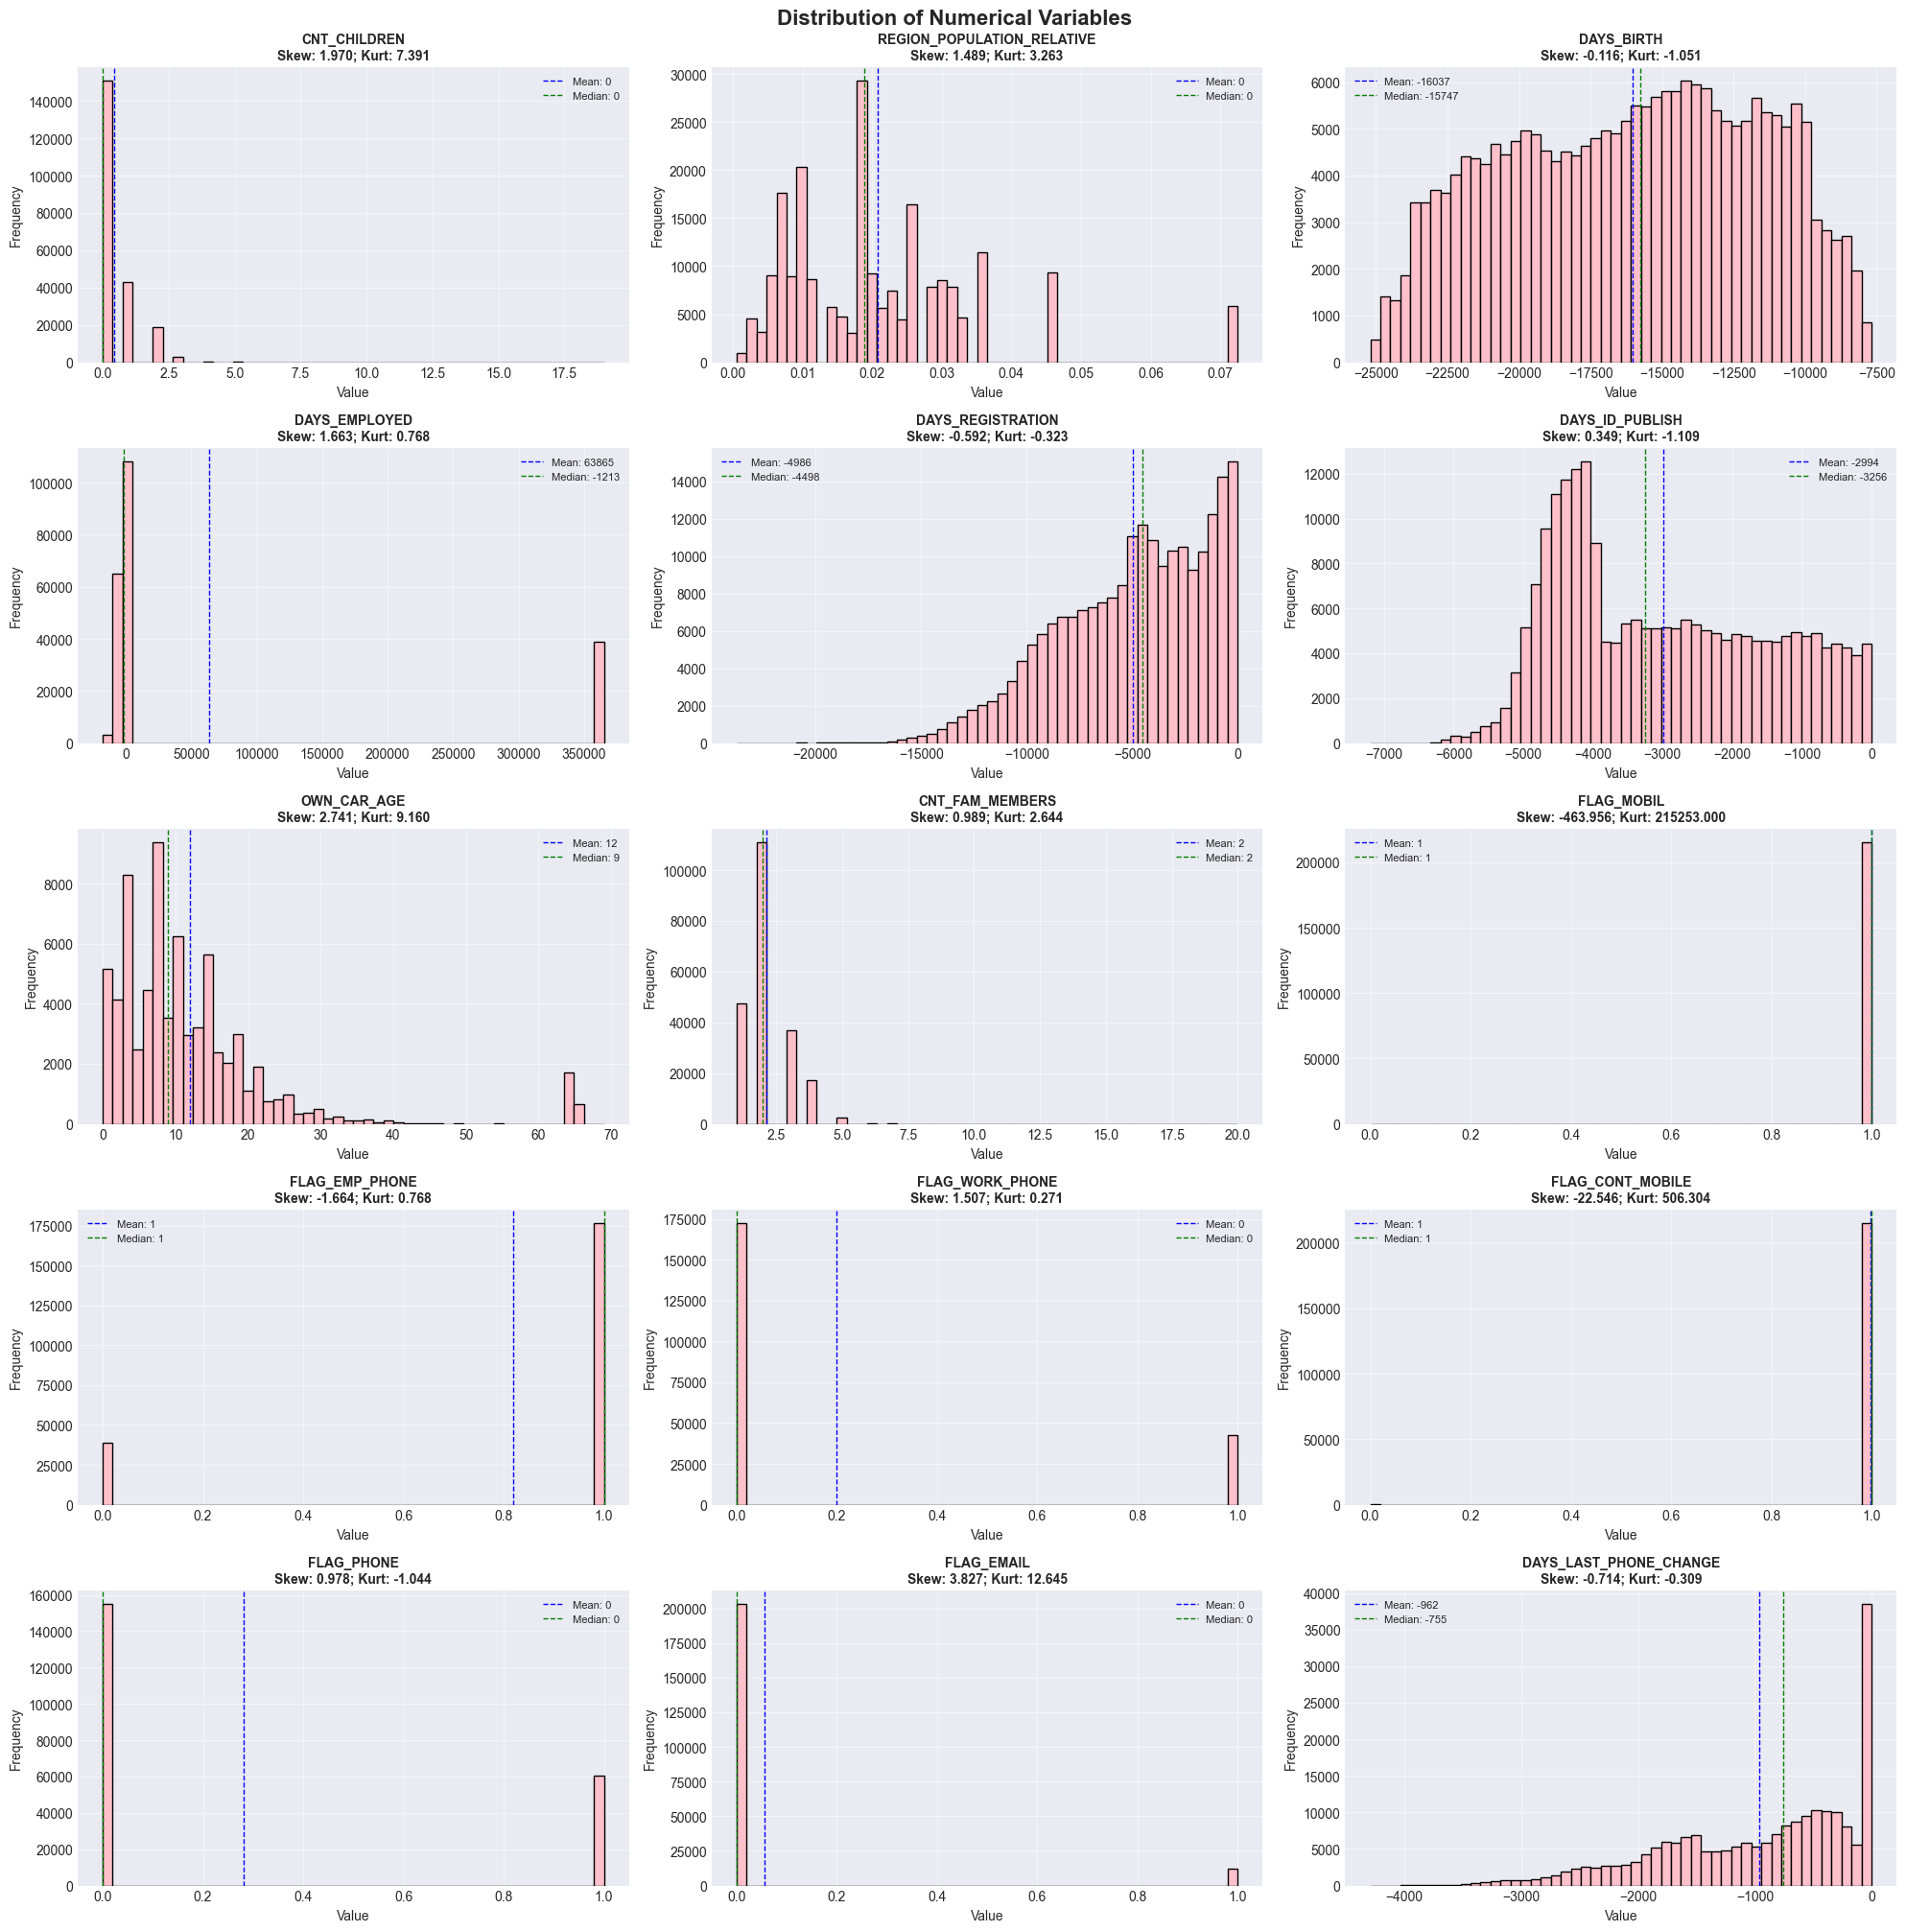

In [6]:
# Tạo histograms cho các biến numerical
n_cols = 3
n_rows = int(np.ceil(len(numerical_demo) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(numerical_demo):
    data = df[col].dropna()
    
    axes[idx].hist(data, bins=50, edgecolor='black', alpha=1, color='pink')
    axes[idx].set_title(f'{col}\nSkew: {stats.skew(data):.3f}; Kurt: {stats.kurtosis(data):.3f}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.5)
    
    # Thêm đường thẳng mean và median
    axes[idx].axvline(data.mean(), color='blue', linestyle='--', linewidth=1, label=f'Mean: {data.mean():.0f}')
    axes[idx].axvline(data.median(), color='green', linestyle='--', linewidth=1, label=f'Median: {data.median():.0f}')
    axes[idx].legend(fontsize=8)

for idx in range(len(numerical_demo), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Distribution of Numerical Variables', y=1.005, fontsize=16, fontweight='bold')
plt.show()

In [7]:
# Phân phối các biến categorical
for col in categorical_demo:
    value_counts = df[col].value_counts(dropna=False)
    pct = (df[col].value_counts(normalize=True, dropna=False) * 100).round(2)
    print(f"{col}:")
    
    
    
    cat_df = pd.DataFrame({
        'Category': value_counts.index,
        'Count': value_counts.values,
        'Percentage': pct.values
    })
    
    display(cat_df)

CODE_GENDER:


,Category,Count,Percentage
0,F,141571,65.77
1,M,73683,34.23
2,XNA,4,0.00


FLAG_OWN_CAR:


,Category,Count,Percentage
0,N,142102,66.01
1,Y,73156,33.99


FLAG_OWN_REALTY:


,Category,Count,Percentage
0,Y,149270,69.34
1,N,65988,30.66


NAME_INCOME_TYPE:


,Category,Count,Percentage
0,Working,111204,51.66
1,Commercial associate,50132,23.29
2,Pensioner,38780,18.02
3,State servant,15101,7.02
4,Unemployed,18,0.01
5,Student,14,0.01
6,Businessman,7,0.00
7,Maternity leave,2,0.00


NAME_EDUCATION_TYPE:


,Category,Count,Percentage
0,Secondary / secondary special,152933,71.05
1,Higher education,52389,24.34
2,Incomplete higher,7164,3.33
3,Lower secondary,2656,1.23
4,Academic degree,116,0.05


NAME_FAMILY_STATUS:


,Category,Count,Percentage
0,Married,137714,63.98
1,Single / not married,31692,14.72
2,Civil marriage,20775,9.65
3,Separated,13834,6.43
4,Widow,11241,5.22
5,Unknown,2,0.00


NAME_HOUSING_TYPE:


,Category,Count,Percentage
0,House / apartment,191154,88.80
1,With parents,10321,4.79
2,Municipal apartment,7798,3.62
3,Rented apartment,3371,1.57
4,Office apartment,1831,0.85
5,Co-op apartment,783,0.36


OCCUPATION_TYPE:


,Category,Count,Percentage
0,NaN,67664,31.43
1,Laborers,38656,17.96
2,Sales staff,22337,10.38
3,Core staff,19349,8.99
4,Managers,14899,6.92
5,Drivers,12997,6.04
6,High skill tech staff,7900,3.67
7,Accountants,6914,3.21
8,Medicine staff,6002,2.79
9,Security staff,4738,2.20


ORGANIZATION_TYPE:


,Category,Count,Percentage
0,Business Entity Type 3,47863,22.24
1,XNA,38790,18.02
2,Self-employed,26697,12.40
3,Other,11671,5.42
4,Medicine,7859,3.65
5,Business Entity Type 2,7397,3.44
6,Government,7254,3.37
7,School,6235,2.90
8,Trade: type 7,5440,2.53
9,Kindergarten,4821,2.24


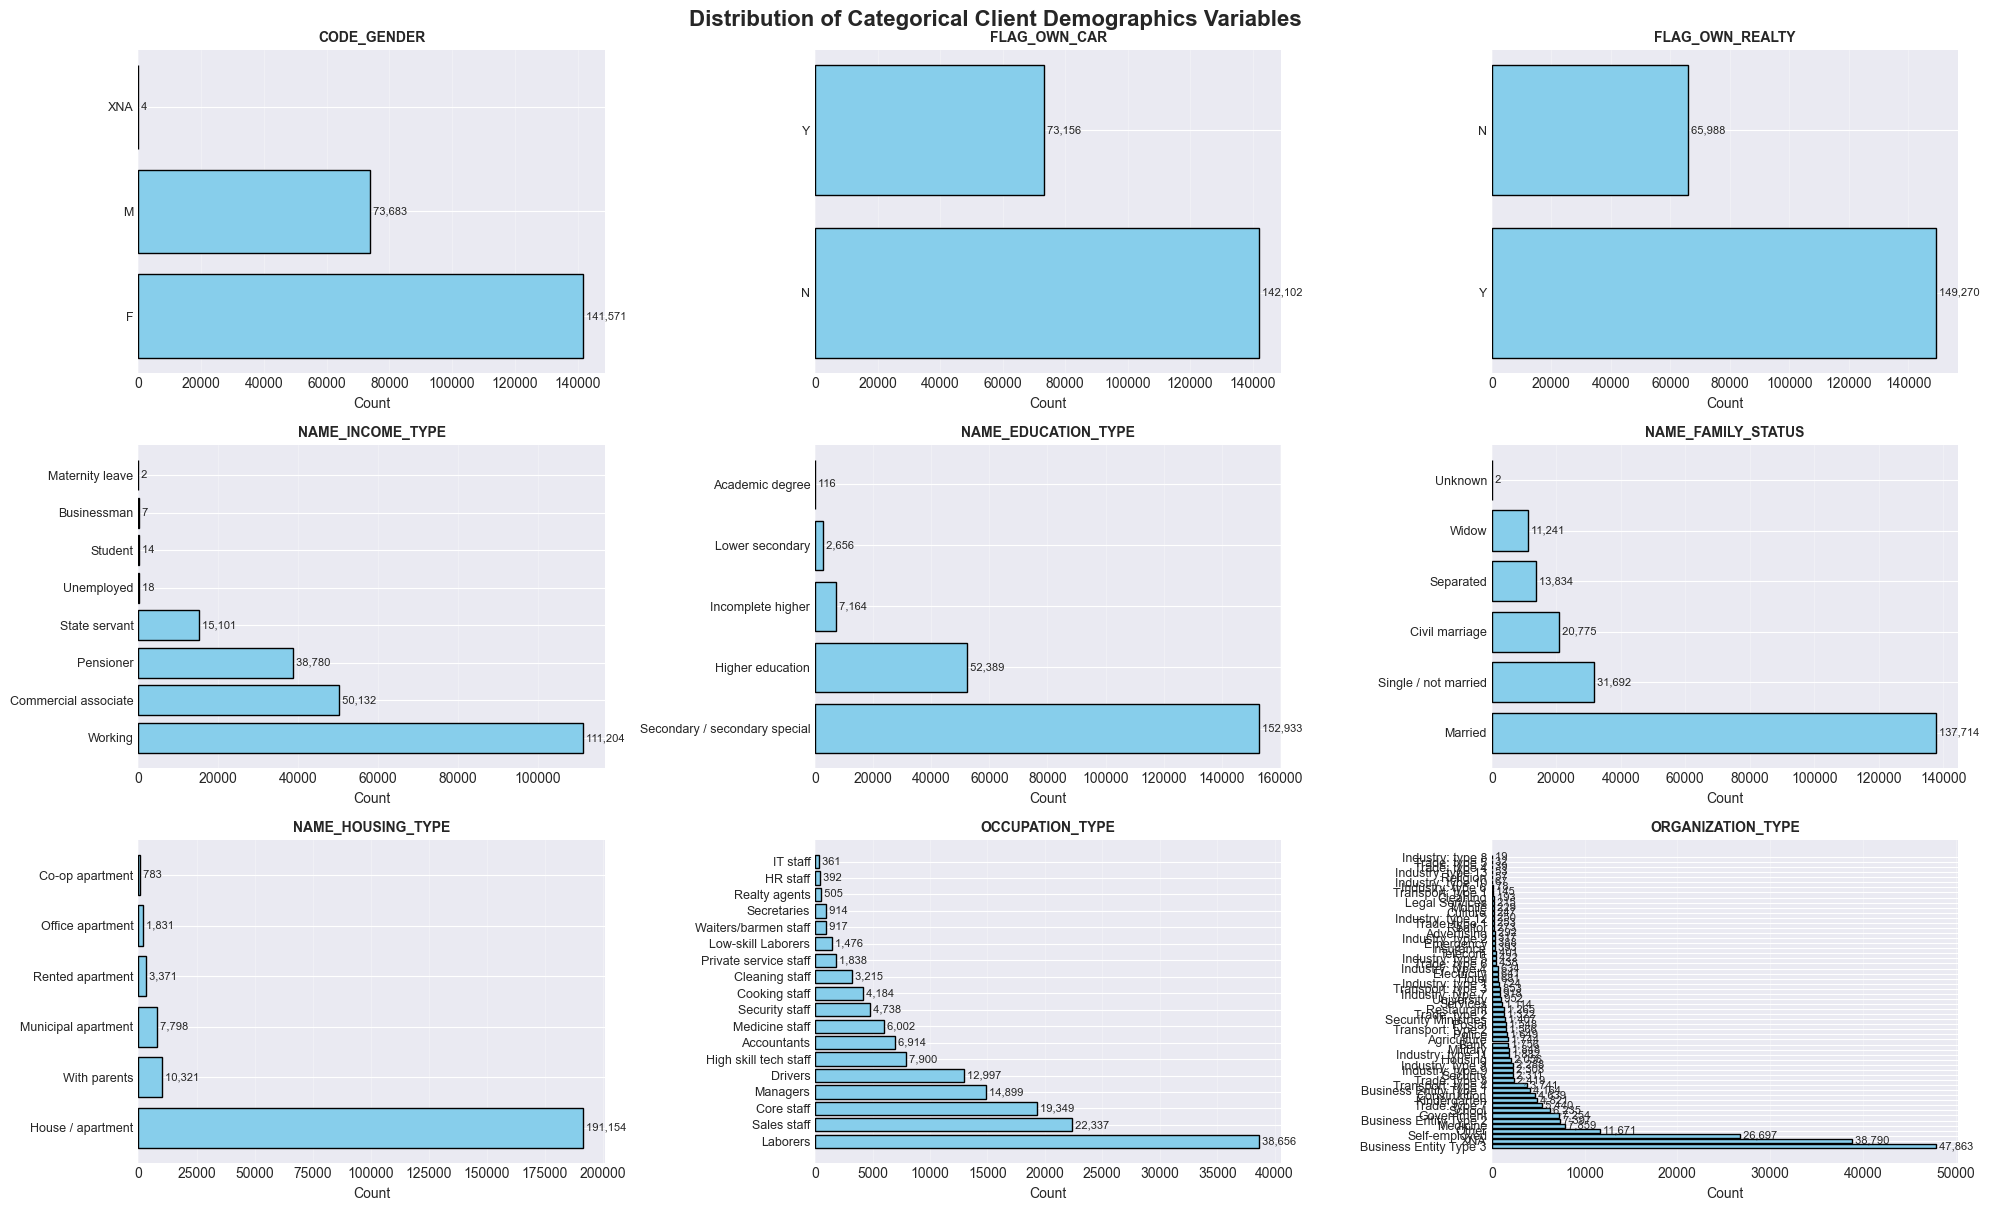

In [8]:
# Vẽ bảng phân phối các biến categorical
n_cat_vars = len(categorical_demo)
n_cols = 3
n_rows = int(np.ceil(n_cat_vars / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(categorical_demo):
    value_counts = df[col].value_counts()
    
    axes[idx].barh(range(len(value_counts)), value_counts.values, color='skyblue', edgecolor='black')
    axes[idx].set_yticks(range(len(value_counts)))
    axes[idx].set_yticklabels(value_counts.index, fontsize=9)
    axes[idx].set_xlabel('Count', fontsize=10)
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].grid(alpha=0.3, axis='x')
    
    for i, v in enumerate(value_counts.values):
        axes[idx].text(v, i, f' {v:,}', va='center', fontsize=8)

# Hide empty subplots
for idx in range(n_cat_vars, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Distribution of Categorical Client Demographics Variables', y=1.005, fontsize=16, fontweight='bold')
plt.show()

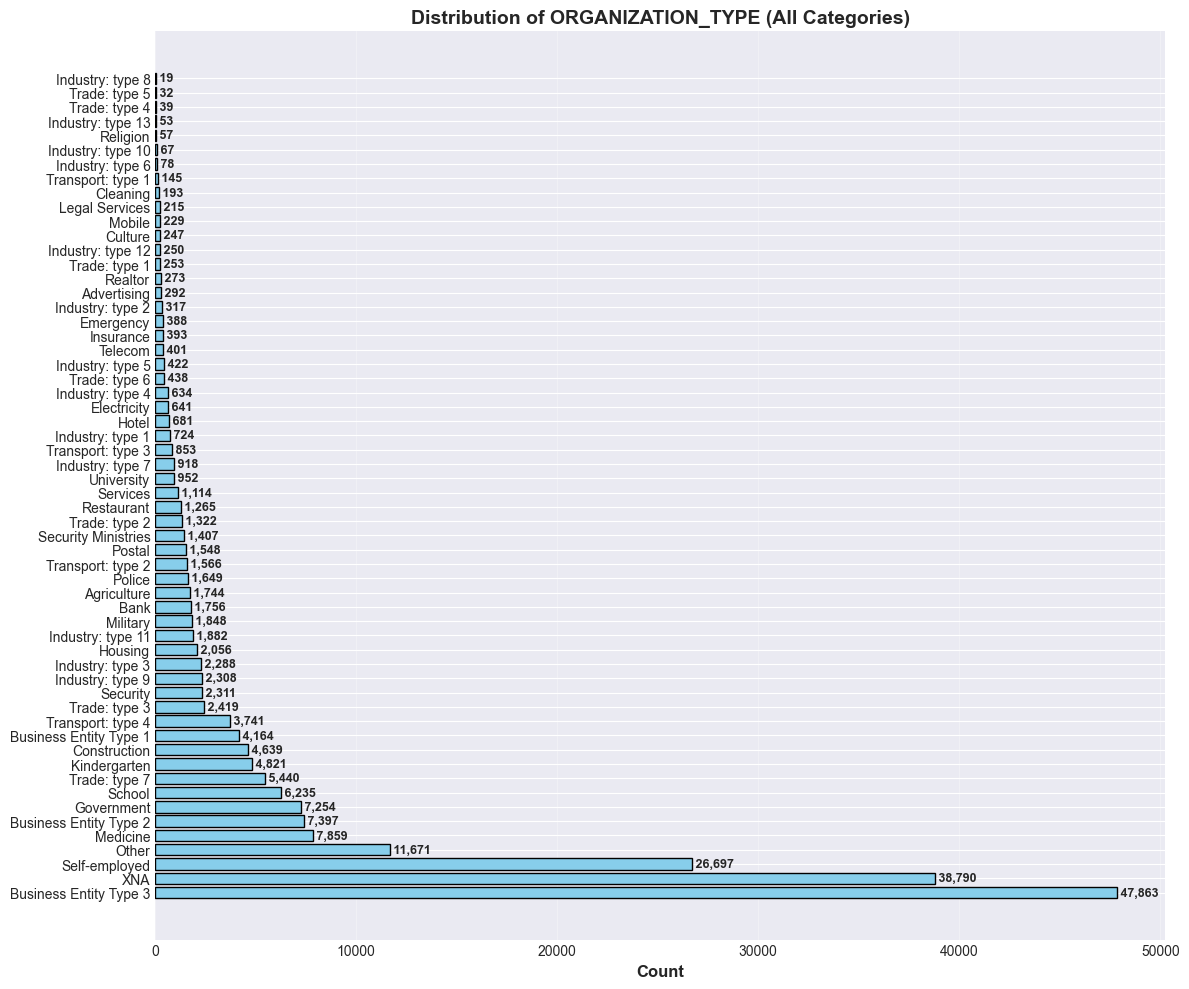

In [9]:
# ORGANIZATION_TYPE phân tích chi tiết
org_counts = df['ORGANIZATION_TYPE'].value_counts()
org_pct = (df['ORGANIZATION_TYPE'].value_counts(normalize=True) * 100).round(2)
org_df = pd.DataFrame({
    'Organization_Type': org_counts.index,
    'Count': org_counts.values,
    'Percentage': org_pct.values
})

fig, ax = plt.subplots(figsize=(12, 10))

colors_list = plt.cm.Set3(np.linspace(0, 1, len(org_df)))
ax.barh(range(len(org_df)), org_df['Count'], color='skyblue', edgecolor='black')
ax.set_yticks(range(len(org_df)))
ax.set_yticklabels(org_df['Organization_Type'], fontsize=10)
ax.set_xlabel('Count', fontsize=12, fontweight='bold')
ax.set_title('Distribution of ORGANIZATION_TYPE (All Categories)', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3, axis='x')

for i, count in enumerate(org_df['Count']):
    ax.text(count, i, f' {count:,}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


## **Missing Data Analysis**

### **Missing Data Types:**
- **MCAR (Missing Completely At Random)**: Missing values are randomly distributed, unrelated to any variable
- **MAR (Missing At Random)**: Missing values depend on observed data but not on the missing values themselves
- **MNAR (Missing Not At Random)**: Missing values depend on unobserved data or the missing value itself

In [10]:
missing_stats = []
for col in client_demo_cols:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    
    if missing_count > 0:
        missing_stats.append({
            'Variable': col,
            'Missing_Count': missing_count,
            'Missing_Percentage': missing_pct,
            'Present_Count': len(df) - missing_count,
            'Data_Type': df[col].dtype
        })

missing_df = pd.DataFrame(missing_stats).sort_values('Missing_Percentage', ascending=False)


In [11]:
missing_df

,Variable,Missing_Count,Missing_Percentage,Present_Count,Data_Type
0,OWN_CAR_AGE,142104,66.015665,73154,float64
1,OCCUPATION_TYPE,67664,31.433907,147594,object
2,CNT_FAM_MEMBERS,2,0.000929,215256,float64
3,DAYS_LAST_PHONE_CHANGE,1,0.000465,215257,float64


##### From what we see from the distribution graph, there are columns that does not contain missing values, but contains "unappropriate values". For example, CODE_GENDER and ORGANIZATION_TYPE has the XNA values, or NAME_FAMILY_STATUS has "unknown" as well as DAYS_EMPLOYED which has invalid placeholder 365243 

### Phân loại missing value vs cách xử lý
* OWN_CAR_AGE: Loại MNAR vì như đã nói ở trên, có thể chỉ do người ta ko có xe hoặc chưa có tiền mua xe hoặc đại loại như v.
&rarr; Tạo binary has_car hoặc là dùng cái FLAG_OWN_CAR

* OCCUPATION_TYPE: Loại MAR ( hoặc MNAR đoán thế), chắc sẽ liên quan đến cái DAYS_EMPLOYED vs NAME_INCOME_TYPE
&rarr; tao đang ko biết xử lý thế nào

* CNT_FAM_MEMBERS: Loại MCAR, có thể do người ta ko có người thân thật, hoặc do vấn đề gì đó mà họ không có gia đình ;-; 
&rarr; Mode imputation hoặc median imputation
* DAYS_LAST_PHONE_CHANGE: Loại MCAR, có thể là do ngta ko thích đổi số điện thoại thì s
&rarr; Mode imputation hoặc median imputation.

In [12]:
df[(df['DAYS_EMPLOYED'] == 365243)]['NAME_INCOME_TYPE'].value_counts(dropna=False)

NAME_INCOME_TYPE
Pensioner     38772
Unemployed       18
Name: count, dtype: int64

In [38]:
work_df = df.copy()

# 0. Drop dòng có CODE_GENDER == 'XNA'
print(f"Original dataset size: {len(work_df):,} rows")
xna_gender_count = (work_df['CODE_GENDER'] == 'XNA').sum()
print(f"Rows with CODE_GENDER == 'XNA': {xna_gender_count:,} (will be dropped)")
work_df = work_df[work_df['CODE_GENDER'] != 'XNA']

print(f"After dropping invalid placeholders: {len(work_df):,} rows\n")

# 1. OWN_CAR_AGE imputation:
#   - If FLAG_OWN_CAR == 'N' and OWN_CAR_AGE is NaN -> fill with 0 
#   - If FLAG_OWN_CAR == 'Y' and OWN_CAR_AGE is NaN -> DROP the row 

non_owners_missing = ((work_df['FLAG_OWN_CAR'] == 'N') & work_df['OWN_CAR_AGE'].isna()).sum()
owners_missing = ((work_df['FLAG_OWN_CAR'] == 'Y') & work_df['OWN_CAR_AGE'].isna()).sum()

print(f"Non-owners with missing OWN_CAR_AGE: {non_owners_missing:,} (will fill with 0)")
print(f"Owners with missing OWN_CAR_AGE: {owners_missing:,} (will be dropped)")

# Fill 0 cho bọn không có xe với độ tuổi xe bị thiếu
work_df.loc[(work_df['FLAG_OWN_CAR'] == 'N') & work_df['OWN_CAR_AGE'].isna(), 'OWN_CAR_AGE'] = 0
print(f"After filling non-owners' missing OWN_CAR_AGE with 0: {len(work_df):,} rows")
median_car_age = work_df.loc[work_df['FLAG_OWN_CAR'] == 'Y', 'OWN_CAR_AGE'].median()

work_df.loc[
    (work_df['FLAG_OWN_CAR'] == 'Y') & (work_df['OWN_CAR_AGE'].isna()),
    'OWN_CAR_AGE'
] = median_car_age
print(f"After filling owners' missing OWN_CAR_AGE with median ({median_car_age}): {len(work_df):,} rows\n")

# Clean DAYS_EMPLOYED placeholder for occupation logic
work_df['DAYS_EMPLOYED'] = work_df['DAYS_EMPLOYED'].replace(365243, np.nan)
work_df['DAYS_EMPLOYED'] = work_df['DAYS_EMPLOYED'].fillna(0)

# 2. OCCUPATION_TYPE imputation 
#   - Use NAME_INCOME_TYPE and employment info to infer 'Unemployed'
#   - Remaining missing -> 'Laborers' (general workforce category)

def impute_occupation(df):
    occ = df['OCCUPATION_TYPE'].copy()
    missing_mask = occ.isna() | (occ == '')
    # Conditions indicating likely unemployment / no defined occupation
    income_unemp = df['NAME_INCOME_TYPE'].str.contains('Pensioner|Unemployed', case=False, regex=True, na=False)
    no_employment_duration = df['DAYS_EMPLOYED'].isna() | (df['DAYS_EMPLOYED'] >= 0)  # người missing employment duration hoặc không có ngày làm việc hợp lệ
    # Cho thành 'Unemployed' nơi cả occupation missing và đang trong độ tuổi không có nghề nghiệp
    occ.loc[missing_mask & (income_unemp | no_employment_duration)] = 'Unemployed'
    # Những cái còn lại gán thành 'Laborers'
    occ.loc[missing_mask & ~(income_unemp | no_employment_duration)] = 'Laborers'
    return occ

# Apply occupation imputation
work_df['OCCUPATION_TYPE'] = impute_occupation(work_df)

# 3. CNT_FAM_MEMBERS median imputation (low missing, numeric distribution skew neutral)
work_df['CNT_FAM_MEMBERS'] = work_df['CNT_FAM_MEMBERS'].fillna(work_df['CNT_FAM_MEMBERS'].median())

# 4. DAYS_LAST_PHONE_CHANGE median imputation (MCAR, very low impact)
work_df['DAYS_LAST_PHONE_CHANGE'] = work_df['DAYS_LAST_PHONE_CHANGE'].fillna(work_df['DAYS_LAST_PHONE_CHANGE'].median())
# 5. ORGANIZATION_TYPE imputation (conditional XNA handling)
if 'ORGANIZATION_TYPE' in work_df.columns:
    initial_xna = int((work_df['ORGANIZATION_TYPE'] == 'XNA').sum())
    replaced_cleaning = 0

    if 'OCCUPATION_TYPE' in work_df.columns and initial_xna > 0:
        mask_cleaning = (
            (work_df['ORGANIZATION_TYPE'] == 'XNA') &
            (work_df['OCCUPATION_TYPE'] == 'Cleaning staff')
        )
        replaced_cleaning = int(mask_cleaning.sum())
        if replaced_cleaning:
            work_df.loc[mask_cleaning, 'ORGANIZATION_TYPE'] = 'Cleaning'

    # Replace remaining XNA with 'No Organization'
    mask_remaining = (work_df['ORGANIZATION_TYPE'] == 'XNA')
    replaced_no_org = int(mask_remaining.sum())
    if replaced_no_org:
        work_df.loc[mask_remaining, 'ORGANIZATION_TYPE'] = 'No Organization'
else:
    print("Column 'ORGANIZATION_TYPE' not found; skipping imputation.")
# Verification summary
print("Remaining missing values (selected columns):")
for col in ['OWN_CAR_AGE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']:
    miss = work_df[col].isna().sum()
    print(f"  {col}: {miss} missing")
print(f"\nFinal cleaned dataset size: {len(work_df):,} rows")
print(f"Total rows dropped: {len(df) - len(work_df):,} ({((len(df) - len(work_df))/len(df)*100):.3f}%)")

Original dataset size: 215,258 rows
Rows with CODE_GENDER == 'XNA': 4 (will be dropped)
After dropping invalid placeholders: 215,254 rows

Non-owners with missing OWN_CAR_AGE: 142,100 (will fill with 0)
Owners with missing OWN_CAR_AGE: 2 (will be dropped)
After filling non-owners' missing OWN_CAR_AGE with 0: 215,254 rows
After filling owners' missing OWN_CAR_AGE with median (9.0): 215,254 rows

Remaining missing values (selected columns):
  OWN_CAR_AGE: 0 missing
  OCCUPATION_TYPE: 0 missing
  CNT_FAM_MEMBERS: 0 missing
  DAYS_LAST_PHONE_CHANGE: 0 missing

Final cleaned dataset size: 215,254 rows
Total rows dropped: 4 (0.002%)
Remaining missing values (selected columns):
  OWN_CAR_AGE: 0 missing
  OCCUPATION_TYPE: 0 missing
  CNT_FAM_MEMBERS: 0 missing
  DAYS_LAST_PHONE_CHANGE: 0 missing

Final cleaned dataset size: 215,254 rows
Total rows dropped: 4 (0.002%)


In [14]:
work_df[(work_df['FLAG_OWN_CAR']=='Y') & (work_df['OWN_CAR_AGE'].isna())]

,ID,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


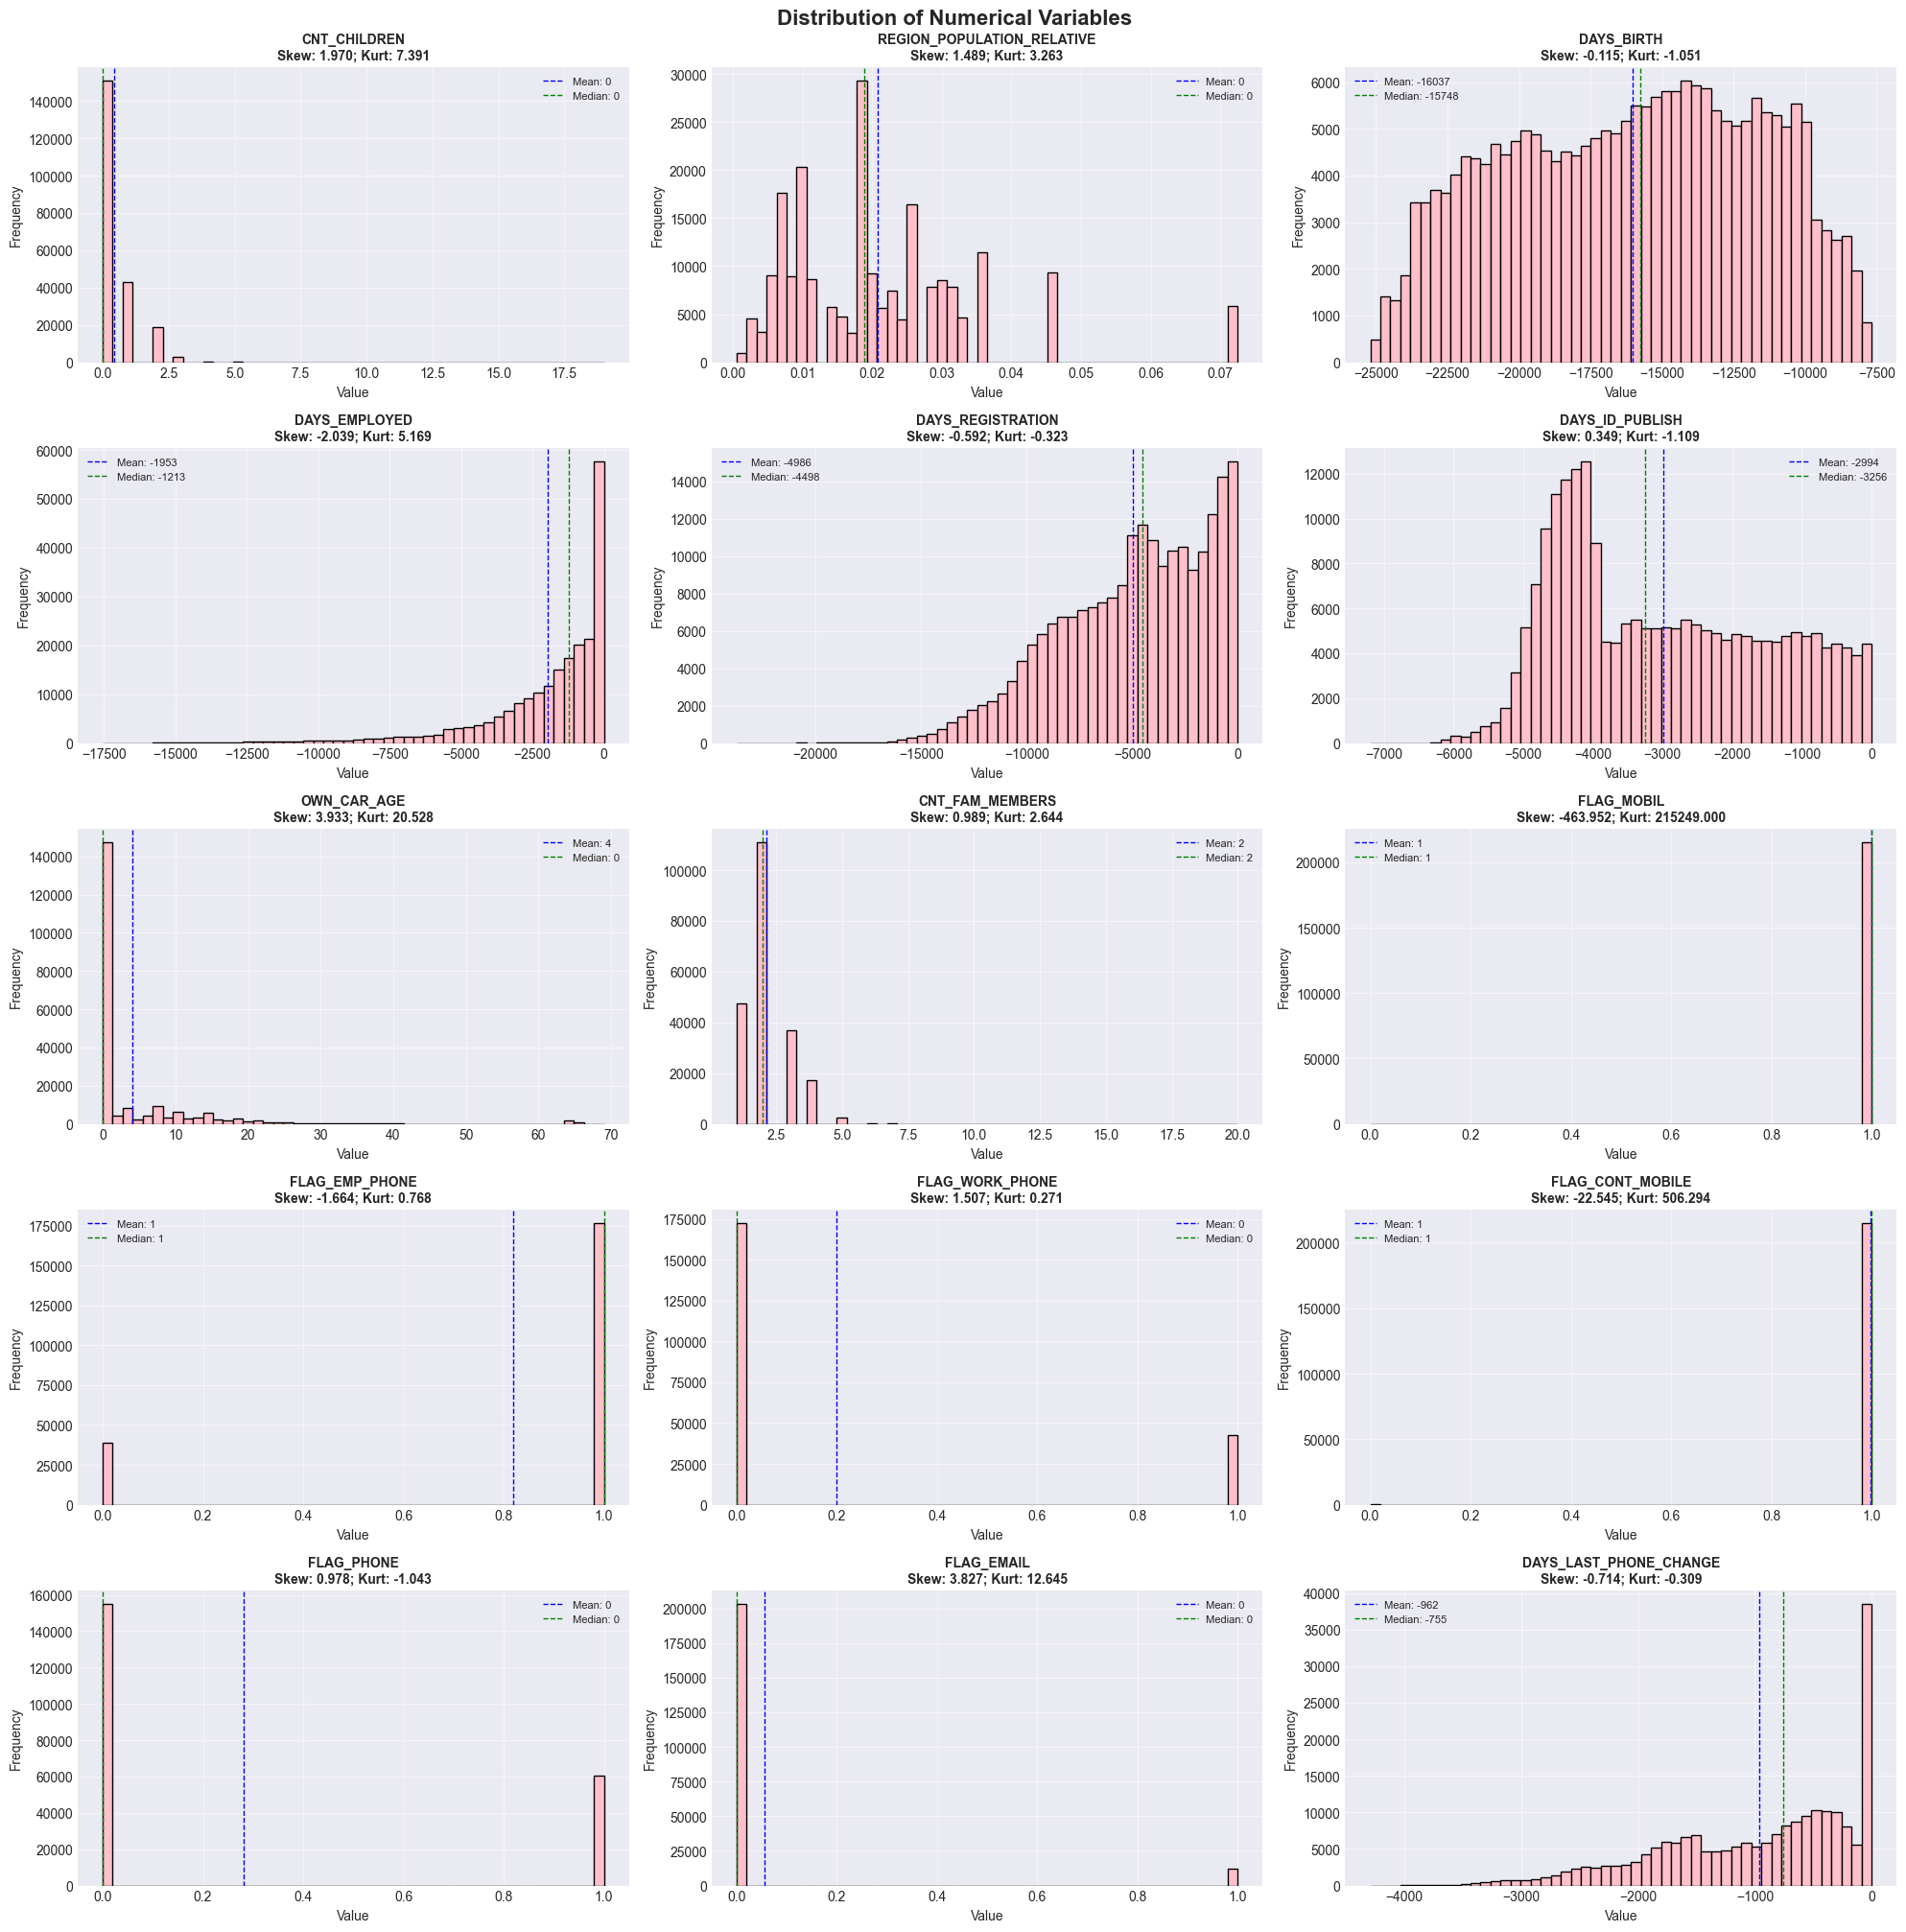

In [15]:
# Tạo histograms cho các biến numerical ( sau khi xử lý missing)
n_cols = 3
n_rows = int(np.ceil(len(numerical_demo) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(numerical_demo):
    data = work_df[col].dropna()
    
    axes[idx].hist(data, bins=50, edgecolor='black', alpha=1, color='pink')
    axes[idx].set_title(f'{col}\nSkew: {stats.skew(data):.3f}; Kurt: {stats.kurtosis(data):.3f}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.5)
    
    # Thêm đường thẳng mean và median
    axes[idx].axvline(data.mean(), color='blue', linestyle='--', linewidth=1, label=f'Mean: {data.mean():.0f}')
    axes[idx].axvline(data.median(), color='green', linestyle='--', linewidth=1, label=f'Median: {data.median():.0f}')
    axes[idx].legend(fontsize=8)

for idx in range(len(numerical_demo), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Distribution of Numerical Variables', y=1.005, fontsize=16, fontweight='bold')
plt.show()


## **Outlier Detection & Analysis**

In [16]:
# IQR
def detect_outliers_iqr(work_df, column):
    Q1 = work_df[column].quantile(0.25)
    Q3 = work_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = work_df[(work_df[column] < lower_bound) | (work_df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, IQR

# Z-Score
def detect_outliers_zscore(work_df, column, threshold=3):
    mean = work_df[column].mean()
    std = work_df[column].std()
    z_scores = np.abs((work_df[column] - mean) / std)
    outliers = work_df[z_scores > threshold]
    return outliers

# Phân tích outlier của numerical
outlier_summary = []

for col in numerical_demo:
    data_clean = work_df[work_df[col].notna()]
    
    if len(data_clean) > 0:
        # IQR method
        outliers_iqr, lower, upper, iqr = detect_outliers_iqr(data_clean, col)
        
        # Z-score method
        outliers_z = detect_outliers_zscore(data_clean, col, threshold=3)
        
        outlier_summary.append({
            'Variable': col,
            'Total_Records': len(data_clean),
            'IQR_Outliers': len(outliers_iqr),
            'IQR_Outlier_Pct': (len(outliers_iqr) / len(data_clean)) * 100,
            'Z_Score_Outliers': len(outliers_z),
            'Z_Score_Outlier_Pct': (len(outliers_z) / len(data_clean)) * 100,
            'Lower_Bound': lower,
            'Upper_Bound': upper,
            'IQR': iqr
        })

outlier_df = pd.DataFrame(outlier_summary).sort_values('IQR_Outlier_Pct', ascending=False)

print("OUTLIER DETECTION SUMMARY (sorted by IQR outlier percentage)")
display(outlier_df.round(2))

# Biến có outlier cao
high_outlier_vars = outlier_df[outlier_df['IQR_Outlier_Pct'] > 5]['Variable'].tolist()

print(f"Variables with >5% outliers (IQR method): {len(high_outlier_vars)}")
print(f"{high_outlier_vars}")

OUTLIER DETECTION SUMMARY (sorted by IQR outlier percentage)


,Variable,Total_Records,IQR_Outliers,IQR_Outlier_Pct,Z_Score_Outliers,Z_Score_Outlier_Pct,Lower_Bound,Upper_Bound,IQR
10,FLAG_WORK_PHONE,215254,42858,19.91,0,0.00,0.00,0.00,0.00
9,FLAG_EMP_PHONE,215254,38800,18.03,0,0.00,1.00,1.00,0.00
6,OWN_CAR_AGE,215254,26482,12.30,3287,1.53,-7.50,12.50,5.00
13,FLAG_EMAIL,215254,12241,5.69,12241,5.69,0.00,0.00,0.00
3,DAYS_EMPLOYED,215254,11806,5.48,4833,2.25,-6462.00,3418.00,2470.00
1,REGION_POPULATION_RELATIVE,215254,5899,2.74,5899,2.74,-0.02,0.06,0.02
0,CNT_CHILDREN,215254,3043,1.41,3043,1.41,-1.50,2.50,1.00
7,CNT_FAM_MEMBERS,215254,2855,1.33,2855,1.33,0.50,4.50,1.00
4,DAYS_REGISTRATION,215254,449,0.21,515,0.24,-15687.00,6201.00,5472.00
11,FLAG_CONT_MOBILE,215254,421,0.20,421,0.20,1.00,1.00,0.00


Variables with >5% outliers (IQR method): 5
['FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'OWN_CAR_AGE', 'FLAG_EMAIL', 'DAYS_EMPLOYED']


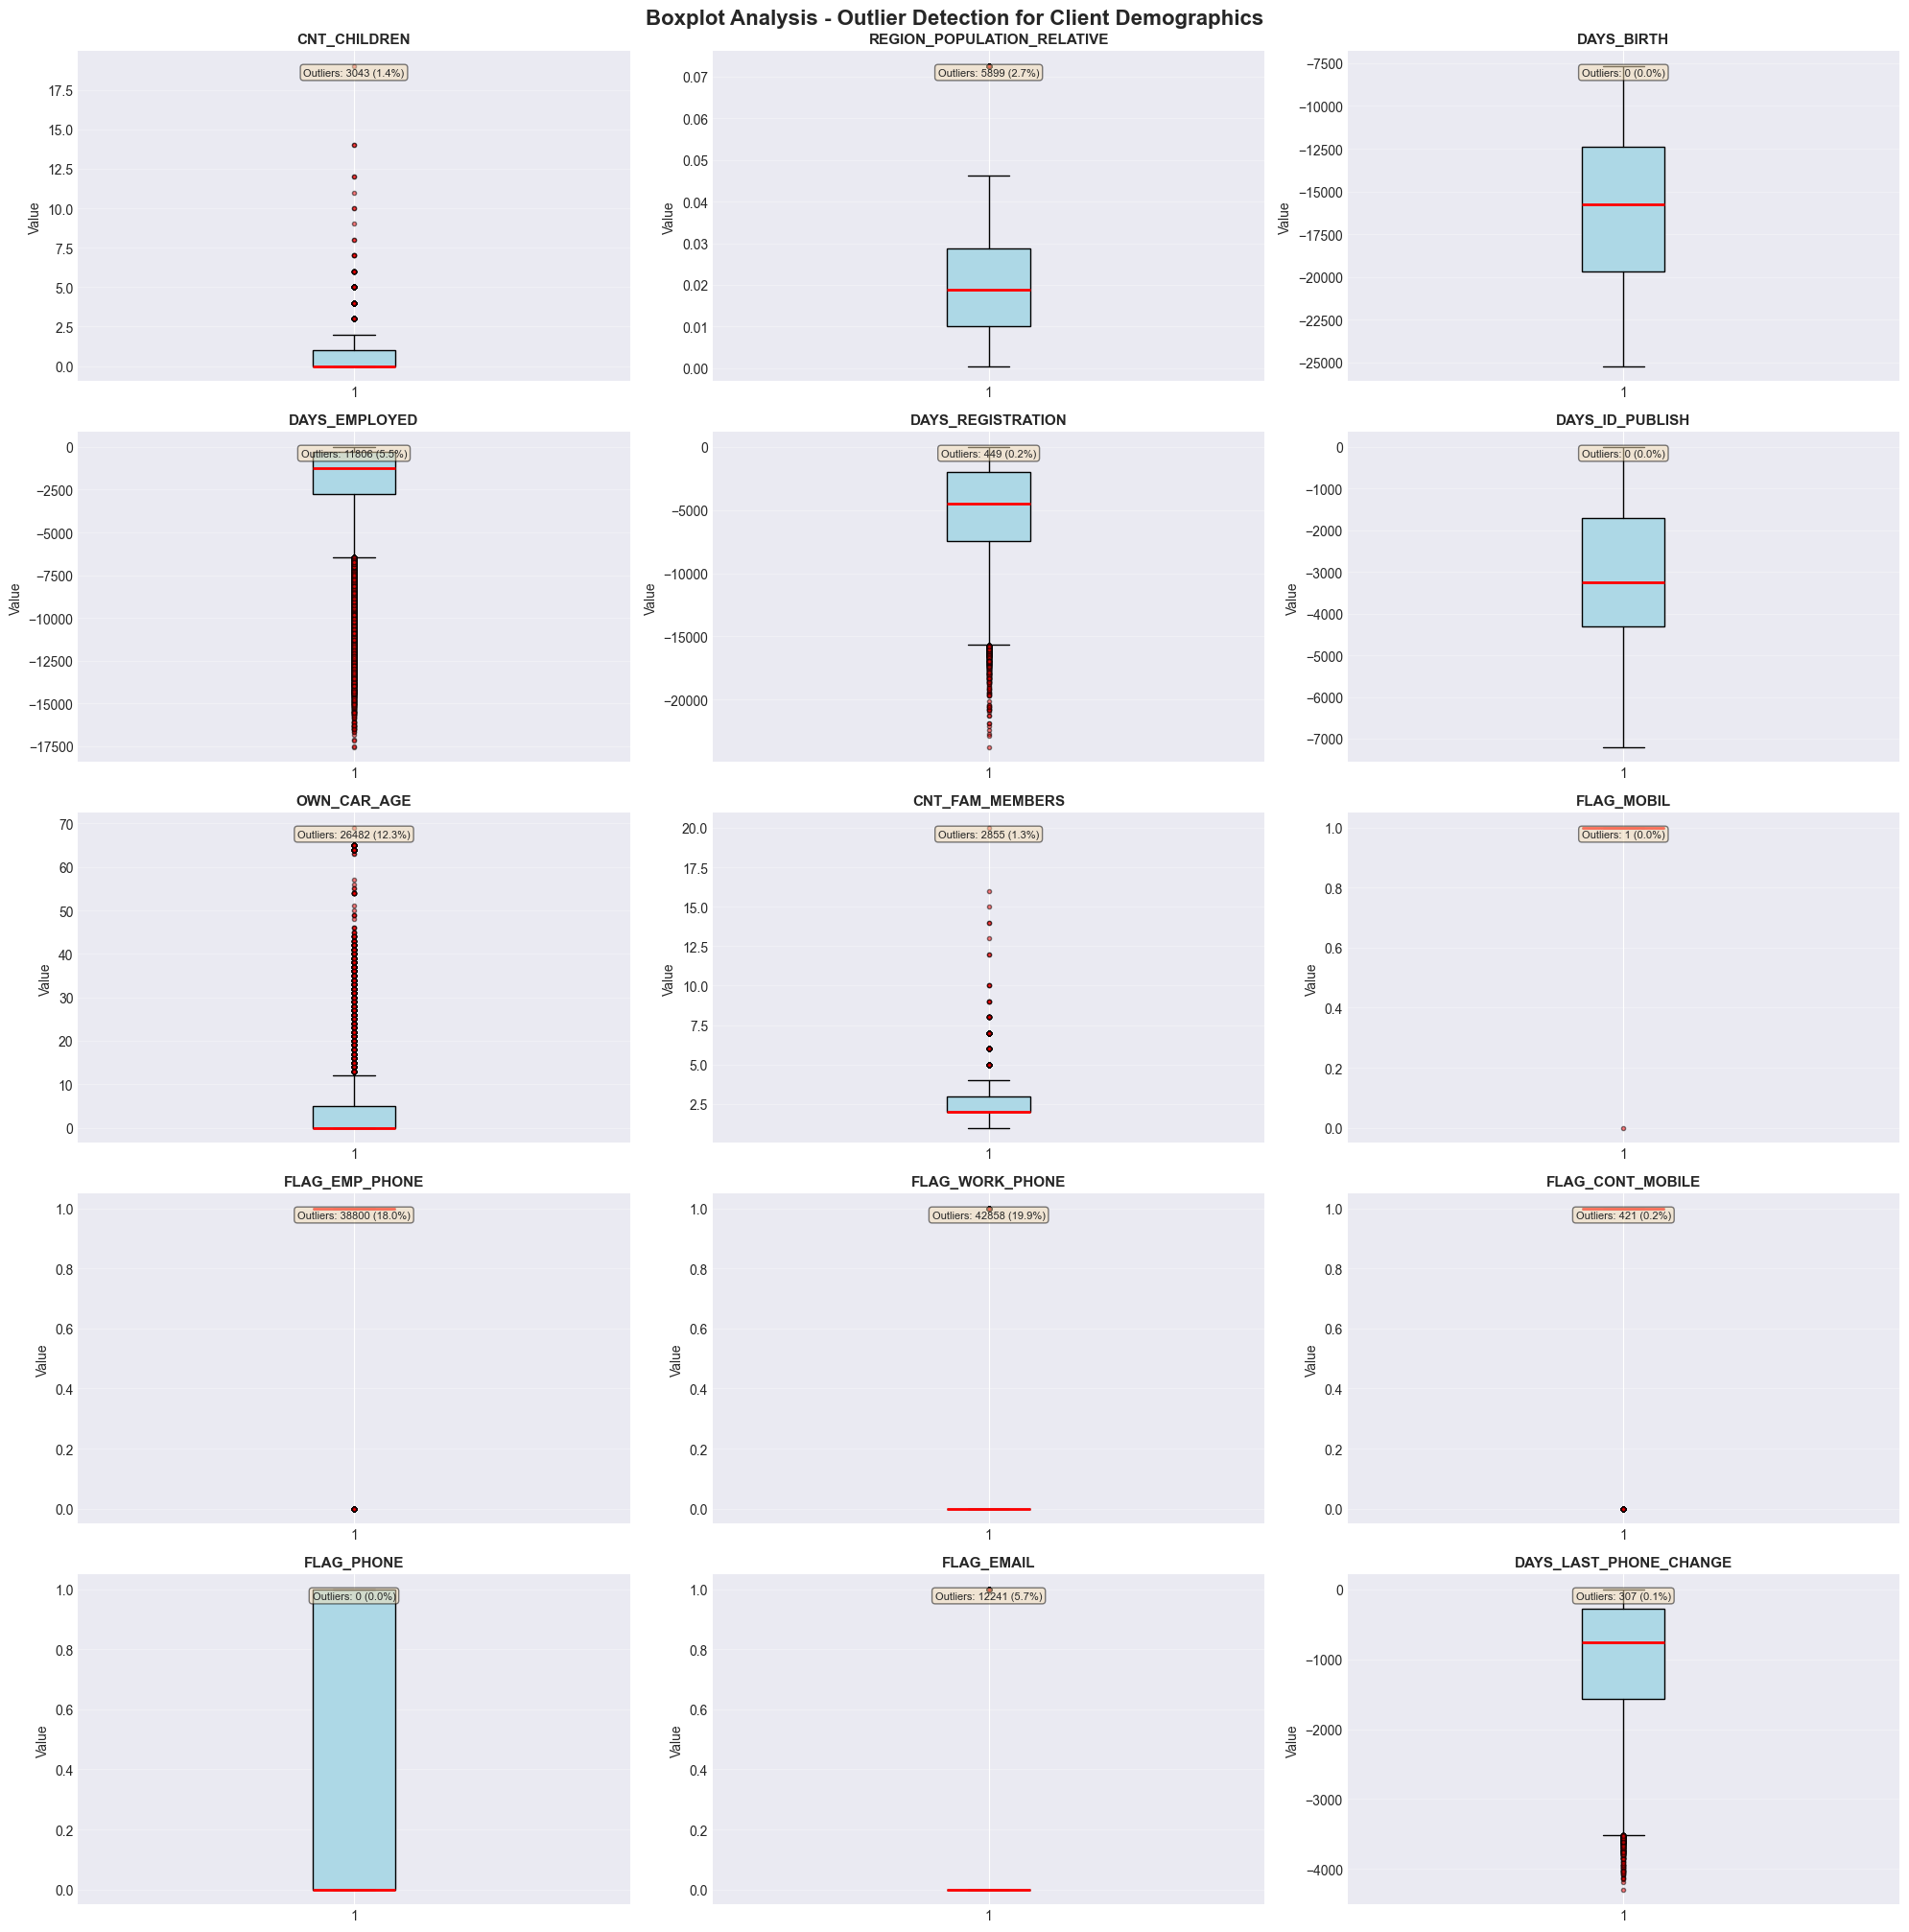

In [17]:
# Boxplot phân tích outlier
n_cols = 3
n_rows = int(np.ceil(len(numerical_demo) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(numerical_demo):
    data_clean = work_df[col].dropna()
    
    if len(data_clean) > 0:
        bp = axes[idx].boxplot(data_clean, vert=True, patch_artist=True,
                               boxprops=dict(facecolor='lightblue', color='black'),
                               whiskerprops=dict(color='black'),
                               capprops=dict(color='black'),
                               medianprops=dict(color='red', linewidth=2),
                               flierprops=dict(marker='o', markerfacecolor='red', markersize=3, alpha=0.5))
        
        axes[idx].set_ylabel('Value', fontsize=10)
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].grid(alpha=0.3, axis='y')
        
        # Statistics
        Q1 = data_clean.quantile(0.25)
        Q3 = data_clean.quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = len(data_clean[(data_clean < Q1 - 1.5*IQR) | (data_clean > Q3 + 1.5*IQR)])
        outlier_pct = (outlier_count / len(data_clean)) * 100
        
        axes[idx].text(0.5, 0.95, f'Outliers: {outlier_count} ({outlier_pct:.1f}%)',
                      transform=axes[idx].transAxes, ha='center', va='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                      fontsize=8)

for idx in range(len(numerical_demo), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Boxplot Analysis - Outlier Detection for Client Demographics', y=1.005, fontsize=16, fontweight='bold')
plt.show()

<Axes: xlabel='OWN_CAR_AGE'>

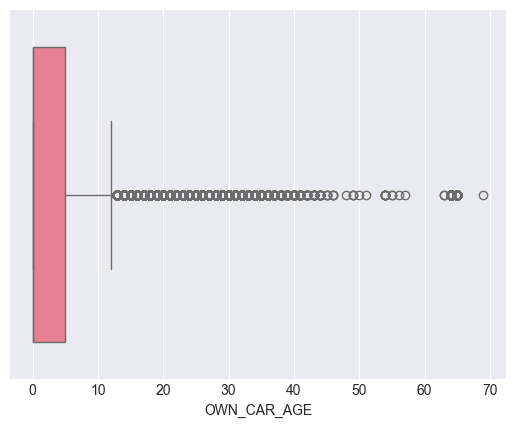

In [18]:
sns.boxplot(x = work_df['OWN_CAR_AGE'])

##### To handle OWN_CAR_AGE outlier, we'll be using log1p(x) ( equivalent to applying the natural logarithm to 1 + x,  i.e log(1+x)), which can help reduce the influence of outliers, especially when the data has a heavy tail. This can also reduce skewness ( in this case right-skewed / positively skewed) distributions and handle zero and negative values

<Axes: xlabel='OWN_CAR_AGE'>

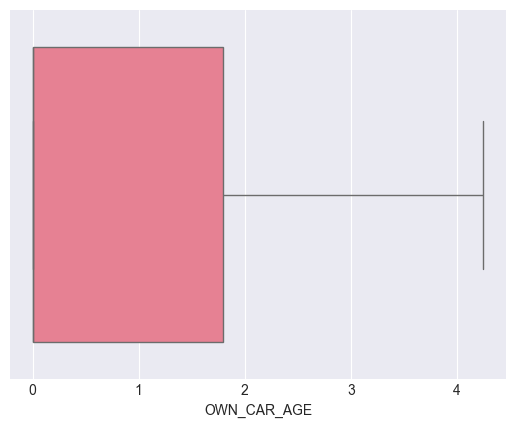

In [19]:
work_df['OWN_CAR_AGE'] = np.log1p(work_df['OWN_CAR_AGE'])
sns.boxplot(x = work_df['OWN_CAR_AGE'])

Phần phân tích insights...

## **Phân loại biến theo Discrete vs Continuous để xử lý Outliers**

### **Discrete Variables (Biến rời rạc):**
- **Cách xử lý**: Kiểm tra business logic - giá trị cao có hợp lý không? (VD: 19 đứa con là outlier hay dữ liệu thật?)

### **Continuous Variables (Biến liên tục):**
- **Cách xử lý**: Áp dụng IQR, Z-score, hoặc transformation sau khi kiểm tra insight

In [20]:
# Phân loại các biến numerical thành discrete và continuous
discrete_vars = []
continuous_vars = []

for col in numerical_demo:
    unique_count = work_df[col].nunique()
    total_count = len(work_df[col].dropna())
    unique_ratio = unique_count / total_count
    
    # Kiểm tra xem biến có phải số nguyên không
    is_integer = work_df[col].dropna().apply(lambda x: x == int(x)).all() if total_count > 0 else False
    
    # Phân loại:
    # Discrete: ít unique values (<30) HOẶC tất cả là số nguyên và unique_ratio < 0.05
    if unique_count < 30 or (is_integer and unique_ratio < 0.05):
        discrete_vars.append({
            'Variable': col,
            'Unique_Count': unique_count,
            'Total_Count': total_count,
            'Unique_Ratio': unique_ratio * 100,
            'Is_Integer': is_integer
        })
    else:
        continuous_vars.append({
            'Variable': col,
            'Unique_Count': unique_count,
            'Total_Count': total_count,
            'Unique_Ratio': unique_ratio * 100,
            'Is_Integer': is_integer
        })

discrete_df = pd.DataFrame(discrete_vars)
continuous_df = pd.DataFrame(continuous_vars)


print("PHÂN LOẠI BIẾN NUMERICAL")
print(f"DISCRETE VARIABLES (Biến rời rạc): {len(discrete_df)} biến")
print(f"CONTINUOUS VARIABLES (Biến liên tục): {len(continuous_df)} biến")

print("\nDISCRETE VARIABLES:")
display(discrete_df.sort_values('Unique_Count'))

print("CONTINUOUS VARIABLES:")
display(continuous_df.sort_values('Unique_Count'))

PHÂN LOẠI BIẾN NUMERICAL
DISCRETE VARIABLES (Biến rời rạc): 10 biến
CONTINUOUS VARIABLES (Biến liên tục): 5 biến

DISCRETE VARIABLES:


,Variable,Unique_Count,Total_Count,Unique_Ratio,Is_Integer
3,FLAG_MOBIL,2,215254,0.000929,True
4,FLAG_EMP_PHONE,2,215254,0.000929,True
5,FLAG_WORK_PHONE,2,215254,0.000929,True
6,FLAG_CONT_MOBILE,2,215254,0.000929,True
7,FLAG_PHONE,2,215254,0.000929,True
8,FLAG_EMAIL,2,215254,0.000929,True
0,CNT_CHILDREN,15,215254,0.006969,True
2,CNT_FAM_MEMBERS,16,215254,0.007433,True
9,DAYS_LAST_PHONE_CHANGE,3719,215254,1.727726,True
1,DAYS_ID_PUBLISH,6114,215254,2.840365,True


CONTINUOUS VARIABLES:


,Variable,Unique_Count,Total_Count,Unique_Ratio,Is_Integer
4,OWN_CAR_AGE,59,215254,0.027409,False
0,REGION_POPULATION_RELATIVE,80,215254,0.037165,False
2,DAYS_EMPLOYED,11749,215254,5.458203,True
3,DAYS_REGISTRATION,15253,215254,7.086047,True
1,DAYS_BIRTH,17372,215254,8.070466,True


### **BƯỚC 1: Phân tích Outliers cho DISCRETE Variables**
Với biến rời rạc, ta cần kiểm tra **business logic** trước khi quyết định có phải outlier thật không

In [ ]:
# Phân tích chi tiết outliers cho DISCRETE variables

print("DISCRETE VARIABLES OUTLIER ANALYSIS")
discrete_var_list = discrete_df['Variable'].tolist()

for col in discrete_var_list:
    print(f"\n *** {col}")
    data = work_df[col].dropna()
    
    # Thống kê cơ bản
    print(f"Range: [{data.min():.0f}, {data.max():.0f}]")
    print(f"Mean: {data.mean():.2f}, Median: {data.median():.0f}, Std: {data.std():.2f}")
    
    # Value counts
    value_counts = data.value_counts().sort_index()
    print(f"\nPhân phối giá trị:")
    
    # Hiển thị top 10 giá trị phổ biến nhất
    top_values = data.value_counts().head(10)
    for val, count in top_values.items():
        pct = (count / len(data)) * 100
        print(f"{val}: {count:,} records ({pct:.2f}%)")
    
    # IQR detection để tham khảo
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    if len(outliers) > 0:
        print(f"\nIQR-based outliers: {len(outliers):,} records ({len(outliers)/len(data)*100:.2f}%)")
        print(f"IQR bounds: [{lower_bound:.1f}, {upper_bound:.1f}]")
        
        # Hiển thị các giá trị outlier
        outlier_values = outliers.value_counts().sort_index()
        print(f"Giá trị outlier: {outlier_values.index.tolist()[:10]}")  # Top 10
        
        # BUSINESS LOGIC CHECK
        print(f"\nBUSINESS INSIGHT:")
        if col == 'CNT_CHILDREN':
            max_children = data.max()
            if max_children > 10:
                print(f" - Có {(data > 10).sum()} hồ sơ có > 10 con")
            print(f" - Giá trị cao có thể là dữ liệu thật (gia đình đông con) -> Giữ lại")
        
        elif col == 'CNT_FAM_MEMBERS':
            print(f" - Số thành viên gia đình cao có thể hợp lý → XEM XÉT GIỮ LẠI")    
        else:
            print(f" Xem xét")
    else:
        print(f"\nKhông có outliers theo IQR method")

DISCRETE VARIABLES OUTLIER ANALYSIS

 *** CNT_CHILDREN
Range: [0, 19]
Mean: 0.42, Median: 0, Std: 0.72

Phân phối giá trị:
0: 150,817 records (70.06%)
1: 42,739 records (19.86%)
2: 18,655 records (8.67%)
3: 2,637 records (1.23%)
4: 311 records (0.14%)
5: 63 records (0.03%)
6: 17 records (0.01%)
7: 4 records (0.00%)
8: 2 records (0.00%)
12: 2 records (0.00%)

IQR-based outliers: 3,043 records (1.41%)
IQR bounds: [-1.5, 2.5]
Giá trị outlier: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

BUSINESS INSIGHT:
 - Có 6 hồ sơ có > 10 con
 - Giá trị cao có thể là dữ liệu thật (gia đình đông con) -> Giữ lại

 *** DAYS_ID_PUBLISH
Range: [-7197, 0]
Mean: -2994.08, Median: -3256, Std: 1510.88

Phân phối giá trị:
-4053: 133 records (0.06%)
-4312: 117 records (0.05%)
-4270: 114 records (0.05%)
-4032: 114 records (0.05%)
-4046: 114 records (0.05%)
-4096: 114 records (0.05%)
-4285: 111 records (0.05%)
-4144: 110 records (0.05%)
-4151: 110 records (0.05%)
-4221: 110 records (0.05%)

Không có outliers theo IQR method

### **BƯỚC 2: Phân tích Outliers cho CONTINUOUS Variables**
Với biến liên tục, ta sẽ:
1. Kiểm tra **insight** và phân phối
2. Áp dụng phương pháp phù hợp: **IQR Capping**, **Z-score**, hoặc **Transformation**

In [22]:
# Phân tích outliers cho CONTINUOUS variables
print("CONTINUOUS VARIABLES OUTLIER ANALYSIS")


continuous_var_list = continuous_df['Variable'].tolist()

outlier_recommendations = []

for col in continuous_var_list:
    print(f"\n *** {col}")
    
    data = work_df[col].dropna()
    
    # Thống kê cơ bản
    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    skew_val = stats.skew(data)
    
    print(f"Range: [{data.min():.2f}, {data.max():.2f}]")
    print(f"Mean: {mean_val:.2f}, Median: {median_val:.2f}, Std: {std_val:.2f}")
    print(f"Skewness: {skew_val:.3f} ({'Right-skewed' if skew_val > 0.5 else ('Left-skewed' if skew_val < -0.5 else 'Symmetric')})")
    
    # IQR Detection
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    iqr_lower = Q1 - 1.5 * IQR
    iqr_upper = Q3 + 1.5 * IQR
    
    iqr_outliers = data[(data < iqr_lower) | (data > iqr_upper)]
    iqr_pct = (len(iqr_outliers) / len(data)) * 100
    
    # Z-score Detection
    z_scores = np.abs((data - mean_val) / std_val)
    z_outliers = data[z_scores > 3]
    z_pct = (len(z_outliers) / len(data)) * 100
    
    print(f"\nOUTLIER DETECTION:")
    print(f"IQR Method: {len(iqr_outliers):,} outliers ({iqr_pct:.2f}%)")
    print(f"Z-score Method (±3σ): {len(z_outliers):,} outliers ({z_pct:.2f}%)")
    
    #RECOMMENDATION
    print(f"\nRECOMMENDED APPROACH:")
    
    recommendation = ""
    method = ""
    
    # Logic quyết định phương pháp
    if abs(skew_val) > 1.5:  # Highly skewed
        recommendation = "Log/Box-Cox transformation"
        method = "transform"
        print(f"Phân phối lệch mạnh (skew={skew_val:.2f})")
        print(f" → Áp dụng TRANSFORMATION (log1p, sqrt, hoặc Box-Cox)")
    
    elif iqr_pct > 10:  # Too many outliers
        recommendation = "Keep outliers (business signal)"
        method = "keep"
        print(f" Quá nhiều outliers ({iqr_pct:.1f}%) - có thể là tín hiệu quan trọng")
        print(f" → XEM XÉT GIỮ LẠI hoặc dùng robust models")
    
    elif iqr_pct > 3:  # Moderate outliers
        recommendation = "IQR Capping"
        method = "iqr_cap"
        print(f"Outliers vừa phải ({iqr_pct:.1f}%)")
        print(f" → Áp dụng IQR CAPPING tại [{iqr_lower:.2f}, {iqr_upper:.2f}]")
    
    elif z_pct > 0.5:  # Few extreme outliers
        recommendation = "Z-score Capping"
        method = "z_cap"
        z_lower = mean_val - 3 * std_val
        z_upper = mean_val + 3 * std_val
        print(f"Ít outliers cực trị ({z_pct:.2f}%)")
        print(f" → Áp dụng Z-SCORE CAPPING tại ±3σ [{z_lower:.2f}, {z_upper:.2f}]")
    
    else:
        recommendation = "No action needed"
        method = "none"
        print(f"Phân phối tốt, outliers tối thiểu")
        print(f" → KHÔNG CẦN xử lý outlier")
    
    outlier_recommendations.append({
        'Variable': col,
        'IQR_Outliers_%': iqr_pct,
        'Z_Outliers_%': z_pct,
        'Skewness': skew_val,
        'Recommendation': recommendation,
        'Method': method
    })


CONTINUOUS VARIABLES OUTLIER ANALYSIS

 *** REGION_POPULATION_RELATIVE
Range: [0.00, 0.07]
Mean: 0.02, Median: 0.02, Std: 0.01
Skewness: 1.489 (Right-skewed)

OUTLIER DETECTION:
IQR Method: 5,899 outliers (2.74%)
Z-score Method (±3σ): 5,899 outliers (2.74%)

RECOMMENDED APPROACH:
Ít outliers cực trị (2.74%)
 → Áp dụng Z-SCORE CAPPING tại ±3σ [-0.02, 0.06]

 *** DAYS_BIRTH
Range: [-25201.00, -7673.00]
Mean: -16037.37, Median: -15747.50, Std: 4369.58
Skewness: -0.115 (Symmetric)

OUTLIER DETECTION:
IQR Method: 0 outliers (0.00%)
Z-score Method (±3σ): 0 outliers (0.00%)

RECOMMENDED APPROACH:
Phân phối tốt, outliers tối thiểu
 → KHÔNG CẦN xử lý outlier

 *** DAYS_EMPLOYED
Range: [-17546.00, 0.00]
Mean: -1952.54, Median: -1213.00, Std: 2303.10
Skewness: -2.039 (Left-skewed)

OUTLIER DETECTION:
IQR Method: 11,806 outliers (5.48%)
Z-score Method (±3σ): 4,833 outliers (2.25%)

RECOMMENDED APPROACH:
Phân phối lệch mạnh (skew=-2.04)
 → Áp dụng TRANSFORMATION (log1p, sqrt, hoặc Box-Cox)

 *** DA

In [23]:
# Tổng hợp khuyến nghị xử lý outlier
recommend_df = pd.DataFrame(outlier_recommendations)

print("TỔNG HỢP KHUYẾN NGHỊ XỬ LÝ OUTLIERS CHO CONTINUOUS VARIABLES")
display(recommend_df.sort_values('IQR_Outliers_%', ascending=False))

# Thống kê phương pháp
print("PHÂN BỐ PHƯƠNG PHÁP XỬ LÝ:")
method_counts = recommend_df['Recommendation'].value_counts()
for method, count in method_counts.items():
    print(f"   {method}: {count} biến")
    

TỔNG HỢP KHUYẾN NGHỊ XỬ LÝ OUTLIERS CHO CONTINUOUS VARIABLES


,Variable,IQR_Outliers_%,Z_Outliers_%,Skewness,Recommendation,Method
2,DAYS_EMPLOYED,5.484683,2.245254,-2.039393,Log/Box-Cox transformation,transform
0,REGION_POPULATION_RELATIVE,2.740483,2.740483,1.488876,Z-score Capping,z_cap
3,DAYS_REGISTRATION,0.208591,0.239252,-0.592418,No action needed,none
1,DAYS_BIRTH,0.000000,0.000000,-0.115498,No action needed,none
4,OWN_CAR_AGE,0.000000,0.000000,1.126257,No action needed,none


PHÂN BỐ PHƯƠNG PHÁP XỬ LÝ:
   No action needed: 3 biến
   Z-score Capping: 1 biến
   Log/Box-Cox transformation: 1 biến


### **BƯỚC 3: Áp dụng xử lý Outliers**
Code mẫu để áp dụng các phương pháp đã khuyến nghị

In [24]:
# ÁP DỤNG XỬ LÝ OUTLIERS theo khuyến nghị
# Tạo bản sao để xử lý
work_df_outlier_handled = work_df.copy()

print("ÁP DỤNG XỬ LÝ OUTLIERS")

for idx, row in recommend_df.iterrows():
    col = row['Variable']
    method = row['Method']
    
    print(f"\n ** {col}: {row['Recommendation']}")
    
    if method == 'iqr_cap':
        # IQR Capping
        Q1 = work_df_outlier_handled[col].quantile(0.25)
        Q3 = work_df_outlier_handled[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        before_outliers = ((work_df_outlier_handled[col] < lower) | (work_df_outlier_handled[col] > upper)).sum()
        work_df_outlier_handled[col] = work_df_outlier_handled[col].clip(lower=lower, upper=upper)
        
        print(f"IQR capping applied: [{lower:.2f}, {upper:.2f}]")
        print(f"Capped {before_outliers:,} values")
    
    elif method == 'z_cap':
        # Z-score Capping
        mean_val = work_df_outlier_handled[col].mean()
        std_val = work_df_outlier_handled[col].std()
        lower = mean_val - 3 * std_val
        upper = mean_val + 3 * std_val
        
        before_outliers = ((work_df_outlier_handled[col] < lower) | (work_df_outlier_handled[col] > upper)).sum()
        work_df_outlier_handled[col] = work_df_outlier_handled[col].clip(lower=lower, upper=upper)
        
        print(f"Z-score capping applied: [{lower:.2f}, {upper:.2f}]")
        print(f"Capped {before_outliers:,} values")
    
    elif method == 'transform':
        # Log transformation (đã áp dụng cho OWN_CAR_AGE rồi)
        if col == 'OWN_CAR_AGE':
            print(f"Log1p transformation đã được áp dụng trước đó")
        else:
            # Áp dụng log1p cho các biến khác nếu cần
            # work_df_outlier_handled[col] = np.log1p(work_df_outlier_handled[col])
            print(f"Cân nhắc áp dụng log/sqrt transformation")
    
    elif method == 'keep':
        print(f"Giữ nguyên - outliers có thể là tín hiệu quan trọng")
    
    elif method == 'none':
        print(f"Không cần xử lý")

print("Hoàn thành xử lý outliers!")
print(f"Dataset: {len(work_df_outlier_handled):,} rows × {len(work_df_outlier_handled.columns)} columns")

ÁP DỤNG XỬ LÝ OUTLIERS

 ** REGION_POPULATION_RELATIVE: Z-score Capping
Z-score capping applied: [-0.02, 0.06]
Capped 5,899 values

 ** DAYS_BIRTH: No action needed
Không cần xử lý

 ** DAYS_EMPLOYED: Log/Box-Cox transformation
Cân nhắc áp dụng log/sqrt transformation

 ** DAYS_REGISTRATION: No action needed
Không cần xử lý

 ** OWN_CAR_AGE: No action needed
Không cần xử lý
Hoàn thành xử lý outliers!
Dataset: 215,254 rows × 122 columns



### ** TÓM TẮT QUY TRÌNH XỬ LÝ OUTLIERS**

**Phương pháp tiếp cận:**
1. **Phân loại biến** → Discrete vs Continuous
   - Discrete: <30 unique values HOẶC integer với unique ratio <5%
   - Continuous: Tất cả các biến còn lại

2. **Discrete Variables** → Kiểm tra business logic
   - CNT_CHILDREN, CNT_FAM_MEMBERS: Giá trị cao có thể hợp lệ
   
3. **Continuous Variables** → Phân tích phân phối rồi quyết định:
....

## **Relationship with Target Variable**

Target Variable Distribution:
Class 0 (No payment difficulty): 197,880 (91.93%)
Class 1 (Payment difficulty): 17,378 (8.07%)
Imbalance Ratio: 1:11.4


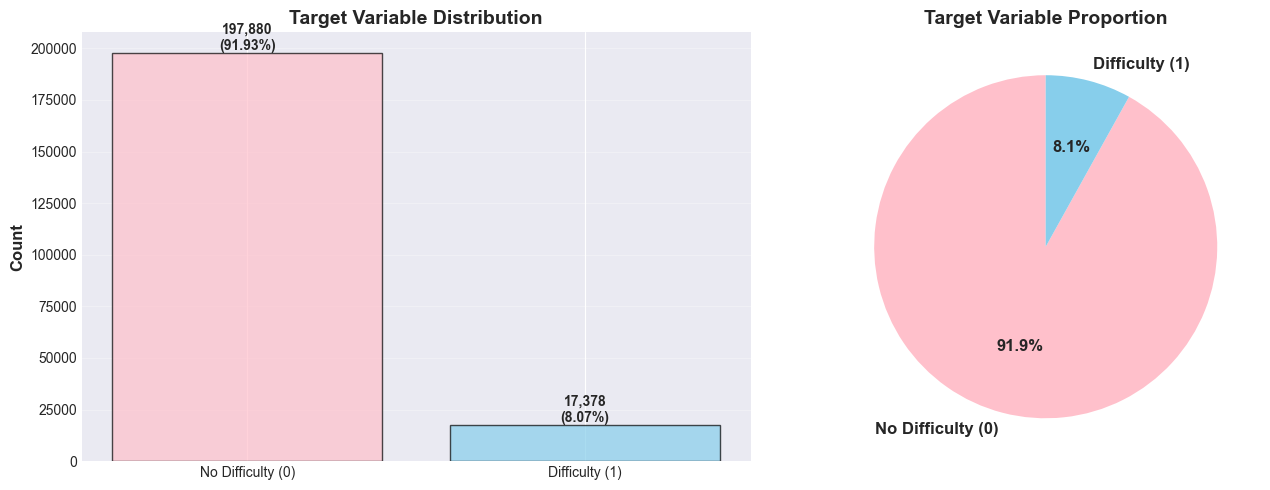

In [25]:
# Xem phân phối biến target của mình
target_dist = df['TARGET'].value_counts()
target_pct = (df['TARGET'].value_counts(normalize=True) * 100).round(2)

print(f"Target Variable Distribution:")
print(f"Class 0 (No payment difficulty): {target_dist[0]:,} ({target_pct[0]}%)")
print(f"Class 1 (Payment difficulty): {target_dist[1]:,} ({target_pct[1]}%)")
print(f"Imbalance Ratio: 1:{target_dist[0]/target_dist[1]:.1f}")

# Bảng :P
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bảng cột
axes[0].bar(['No Difficulty (0)', 'Difficulty (1)'], target_dist.values, 
           color=['pink', 'skyblue'], edgecolor='black', alpha=0.7)
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Target Variable Distribution', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')
for i, v in enumerate(target_dist.values):
    axes[0].text(i, v, f'{v:,}\n({target_pct.values[i]}%)', ha='center', va='bottom', fontweight='bold')

# Bảng bánh <3
axes[1].pie(target_dist.values, labels=['No Difficulty (0)', 'Difficulty (1)'], 
           autopct='%1.1f%%', colors=['pink', 'skyblue'], startangle=90,
           textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Target Variable Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

INSIGHTS...

### Correlation of the TARGET variable with numerical columns

Correlation with TARGET:


,Variable,Correlation,Abs_Correlation,Strength
2,DAYS_BIRTH,0.0778,0.0778,Weak
14,DAYS_LAST_PHONE_CHANGE,0.0544,0.0544,Weak
5,DAYS_ID_PUBLISH,0.0526,0.0526,Weak
9,FLAG_EMP_PHONE,0.0452,0.0452,Weak
3,DAYS_EMPLOYED,-0.0442,0.0442,Weak
6,OWN_CAR_AGE,0.0411,0.0411,Weak
4,DAYS_REGISTRATION,0.0408,0.0408,Weak
1,REGION_POPULATION_RELATIVE,-0.0377,0.0377,Weak
10,FLAG_WORK_PHONE,0.0275,0.0275,Weak
12,FLAG_PHONE,-0.0253,0.0253,Weak


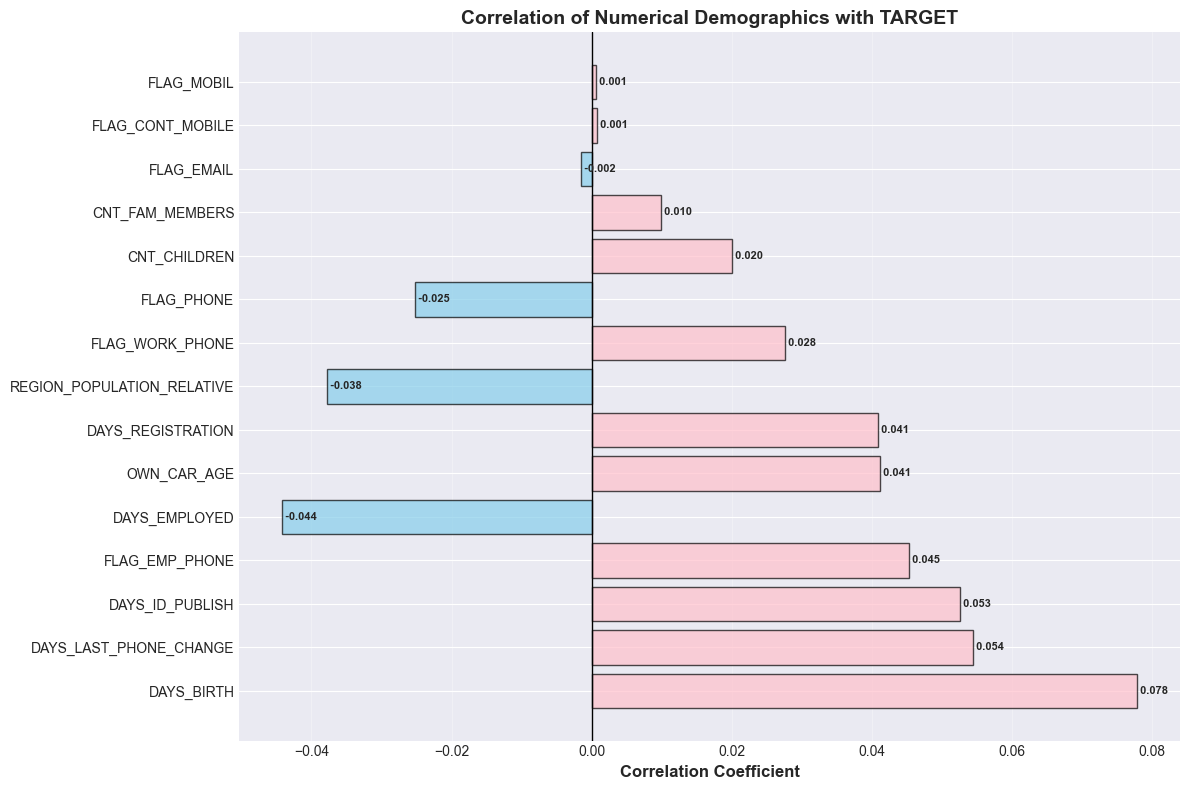

In [26]:
# Corr của biến TARGET vs các cột numerical
target_corr = []
for col in numerical_demo:
    if col in df.columns:
        corr = df[col].corr(df['TARGET'])
        target_corr.append({
            'Variable': col,
            'Correlation': corr,
            'Abs_Correlation': abs(corr)
        })

corr_df = pd.DataFrame(target_corr).sort_values('Abs_Correlation', ascending=False)
corr_df['Strength'] = corr_df['Abs_Correlation'].apply(
    lambda x: 'Strong' if x > 0.3 else ('Moderate' if x > 0.1 else 'Weak')
)

print("Correlation with TARGET:")
display(corr_df.round(4))

# Lại là vẽ bảng
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['pink' if x > 0 else 'skyblue' for x in corr_df['Correlation']]
bars = ax.barh(range(len(corr_df)), corr_df['Correlation'], color=colors, edgecolor='black', alpha=0.7)

ax.set_yticks(range(len(corr_df)))
ax.set_yticklabels(corr_df['Variable'], fontsize=10)
ax.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
ax.set_title('Correlation of Numerical Demographics with TARGET', fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=1)
ax.grid(alpha=0.3, axis='x')

for i, (idx, row) in enumerate(corr_df.iterrows()):
    value = row['Correlation']
    ax.text(value, i, f' {value:.3f}', va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

Tương quan dương → Rủi ro khách hàng sủi nợ cao hơn\
Tương quan âm → Rủi ro khách hàng sủi nợ thấp hơn

CORRELATION MATRIX


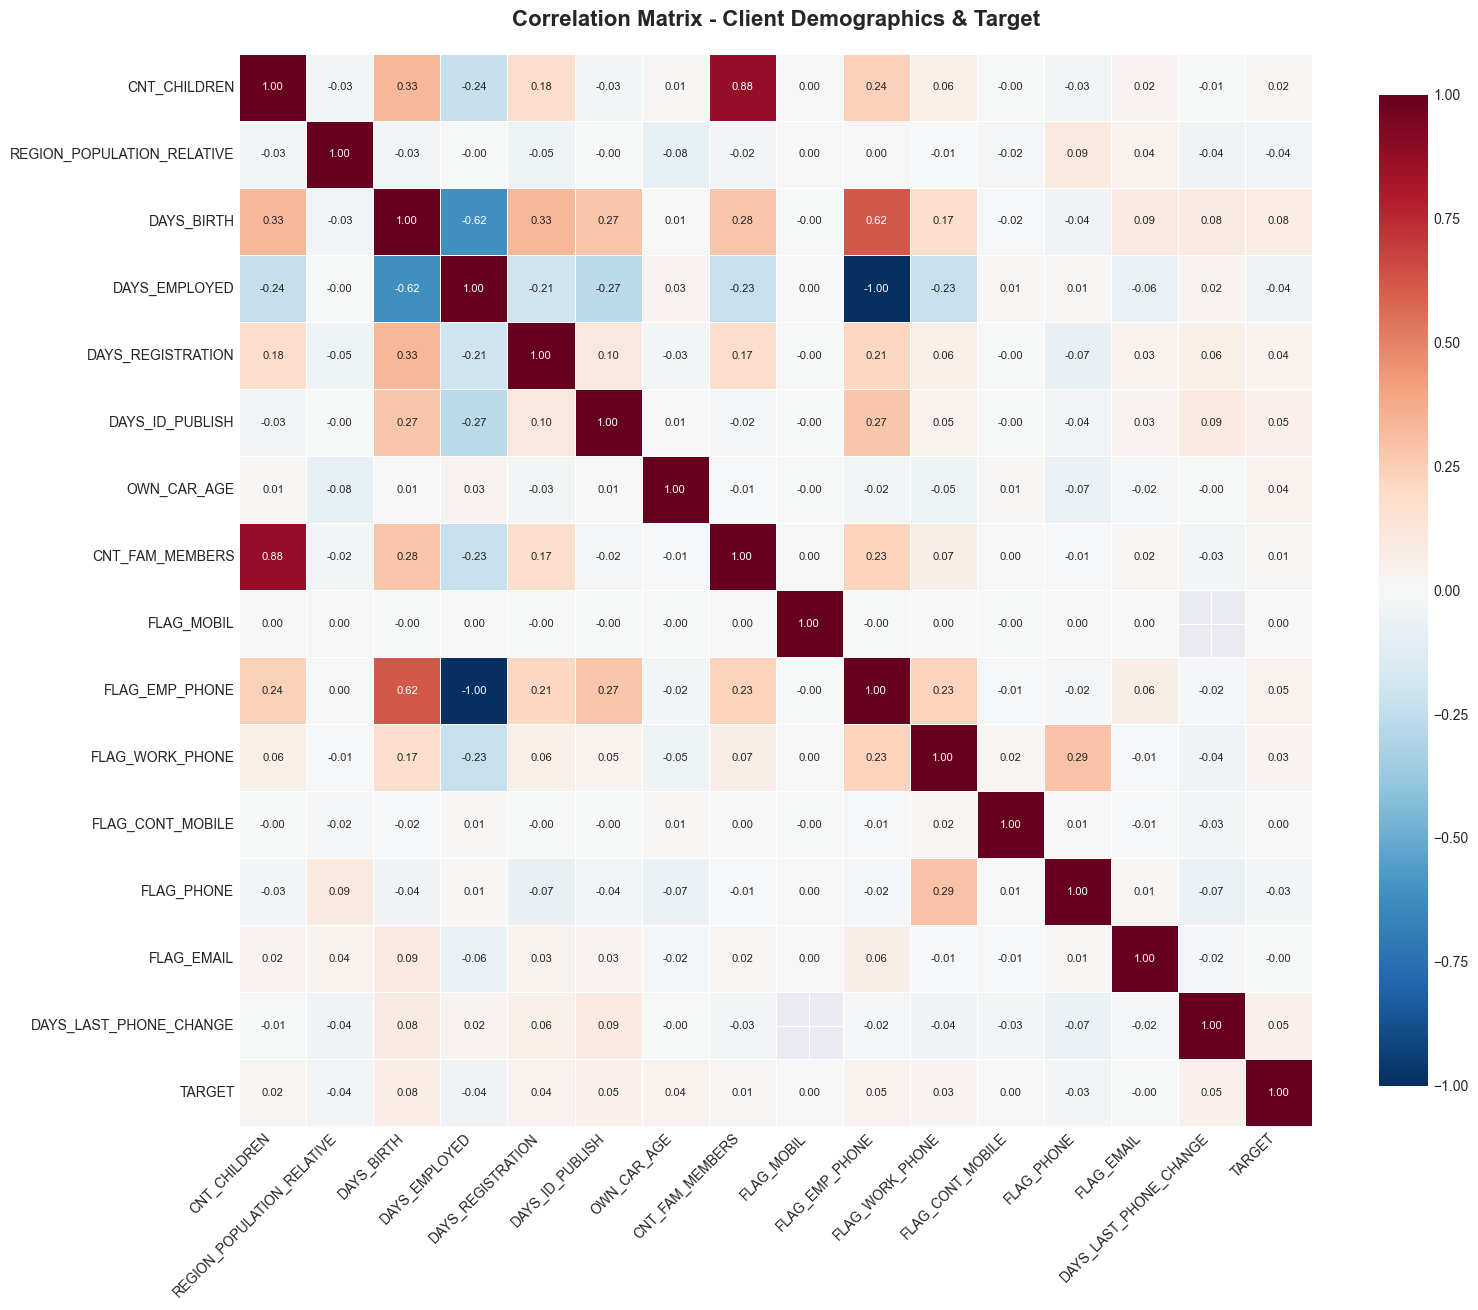

In [27]:
# Ma trận tương quan
print("CORRELATION MATRIX")

corr_cols = numerical_demo.copy()
if 'TARGET' not in corr_cols:
    corr_cols.append('TARGET')

corr_matrix = df[corr_cols].corr()

# Heatmap
fig, ax = plt.subplots(figsize=(16, 14))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax, annot_kws={'fontsize': 8})

ax.set_title('Correlation Matrix - Client Demographics & Target', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

### **Chi-Square Test for correlation between categorical f. and TARGET**

**Interpretation:**
- **p-value < 0.05**: Reject null hypothesis &rarr; significant association exists
- **p-value ≥ 0.05**: Fail to reject null hypothesis &rarr; no significant association

In [28]:
from scipy.stats import chi2_contingency

chi_square_results = []

for col in categorical_demo:
    # Tạo bảng
    contingency_table = pd.crosstab(work_df[col], work_df['TARGET'])
    
    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)
    
    chi_square_results.append({
        'Variable': col,
        'Chi2_Statistic': chi2_stat,
        'P_Value': p_value,
        'Degrees_of_Freedom': dof,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

chi_df = pd.DataFrame(chi_square_results).sort_values('Chi2_Statistic', ascending=False)

print("CHI-SQUARE TEST RESULTS (Categorical Variables vs TARGET)")
display(chi_df)

# Xem có significant ko, nếu significant = yes
sig_count = len(chi_df[chi_df['Significant'] == 'Yes'])
print(f"Variables with significant association (p < 0.05): {sig_count}/{len(categorical_demo)}")

CHI-SQUARE TEST RESULTS (Categorical Variables vs TARGET)


,Variable,Chi2_Statistic,P_Value,Degrees_of_Freedom,Significant
7,OCCUPATION_TYPE,1319.513545,2.667564e-269,18,Yes
8,ORGANIZATION_TYPE,1111.640994,2.287162e-195,57,Yes
3,NAME_INCOME_TYPE,834.470108,6.746801e-176,7,Yes
4,NAME_EDUCATION_TYPE,719.625711,1.961302e-154,4,Yes
0,CODE_GENDER,631.363388,2.525210e-139,1,Yes
5,NAME_FAMILY_STATUS,364.173025,1.553051e-76,5,Yes
6,NAME_HOUSING_TYPE,268.943641,4.718203e-56,5,Yes
1,FLAG_OWN_CAR,103.620147,2.450724e-24,1,Yes
2,FLAG_OWN_REALTY,7.931723,4.857552e-03,1,Yes


Variables with significant association (p < 0.05): 9/9


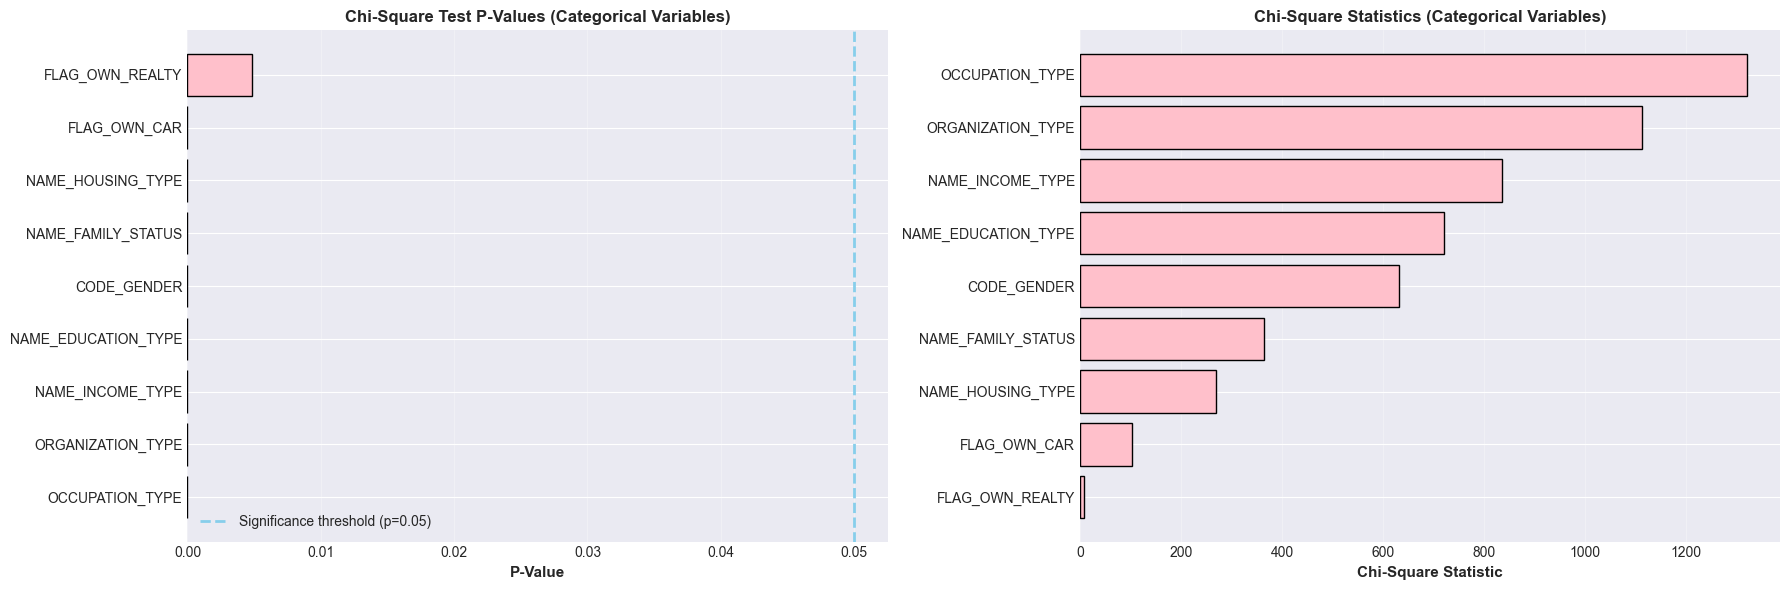

In [29]:
# Vẽ bảng P value + Chi2 stat
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. Chi-square p-values
chi_df_sorted = chi_df.sort_values('P_Value')
colors_chi = ['pink' if p < 0.05 else 'skyblue' for p in chi_df_sorted['P_Value']]

axes[0].barh(range(len(chi_df_sorted)), chi_df_sorted['P_Value'], color=colors_chi, edgecolor='black')
axes[0].set_yticks(range(len(chi_df_sorted)))
axes[0].set_yticklabels(chi_df_sorted['Variable'], fontsize=10)
axes[0].axvline(0.05, color='skyblue', linestyle='--', linewidth=2, label='Significance threshold (p=0.05)')
axes[0].set_xlabel('P-Value', fontsize=11, fontweight='bold')
axes[0].set_title('Chi-Square Test P-Values (Categorical Variables)', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3, axis='x')

# 2. Chi-square statistics
chi_df_sorted_stat = chi_df.sort_values('Chi2_Statistic', ascending=True)
colors_chi_stat = ['pink' if p < 0.05 else 'skyblue' for p in chi_df_sorted_stat['P_Value']]

axes[1].barh(range(len(chi_df_sorted_stat)), chi_df_sorted_stat['Chi2_Statistic'], color=colors_chi_stat, edgecolor='black')
axes[1].set_yticks(range(len(chi_df_sorted_stat)))
axes[1].set_yticklabels(chi_df_sorted_stat['Variable'], fontsize=10)
axes[1].set_xlabel('Chi-Square Statistic', fontsize=11, fontweight='bold')
axes[1].set_title('Chi-Square Statistics (Categorical Variables)', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

### Categorical Features: Strategy

- Identify categorical columns; fill missing as `MISSING`.
- Detect rare categories (< threshold, default 1%) and group into `OTHER`.
- Encoding selection by cardinality:
  - Low/medium (≤ 20 unique after rare-group): One-hot encode.
  - High-cardinality (> 20):
    - If `TARGET` exists → KFold target encoding with smoothing (leakage-safe).
    - Else → frequency encoding (relative frequency).
- Save mappings to apply consistently on validation/test.
- Outputs:
  - `cat_profile_df`: summary of categorical columns.
  - `cat_rare_map`: rare categories per column.
  - `cat_encoders`: encoder metadata and mappings.
  - `work_df_cat_handled`: encoded categorical features.
  - `work_df_prepared`: merge with numeric data (uses `work_df_outlier_handled` when available).

In [30]:
# Profile categorical columns and build rare maps
import pandas as pd
import numpy as np

# Parameters
RARE_THRESHOLD = None
try:
    RARE_THRESHOLD = float(rare_threshold)
except Exception:
    RARE_THRESHOLD = 0.01  # default 1%
ONE_HOT_MAX_UNIQUE = 20

# Detect categorical columns
cat_cols = []
for c in work_df.columns:
    dt = str(work_df[c].dtype)
    if dt == 'object' or dt.startswith('category'):
        cat_cols.append(c)

# Fallback to known list if provided
try:
    if isinstance(categorical_demo, list) and len(categorical_demo) > 0:
        # keep intersection to avoid missing columns
        cat_cols = [c for c in categorical_demo if c in work_df.columns]
except NameError:
    pass

cat_profile = []
cat_rare_map = {}
cat_nunique_after = {}

n = len(work_df)
for col in cat_cols:
    s = work_df[col].astype('object').fillna('MISSING')
    vc = s.value_counts(dropna=False)
    freq = vc / n
    rare_cats = freq[freq < RARE_THRESHOLD].index.tolist()
    nunique = int(vc.shape[0])
    nunique_after = int((vc[~vc.index.isin(rare_cats)]).shape[0] + (1 if len(rare_cats) else 0))
    miss_pct = float((work_df[col].isna().mean()) * 100.0)

    cat_profile.append({
        'Variable': col,
        'Unique': nunique,
        'Unique_after_rare': nunique_after,
        'Rare_threshold': RARE_THRESHOLD,
        'Rare_count': len(rare_cats),
        'Missing_%': round(miss_pct, 2)
    })
    cat_rare_map[col] = set(map(str, rare_cats))
    cat_nunique_after[col] = nunique_after

cat_profile_df = pd.DataFrame(cat_profile).sort_values(['Unique_after_rare','Unique'], ascending=[False, False]).reset_index(drop=True)
print(f"Categorical columns detected: {len(cat_cols)}")
cat_profile_df

Categorical columns detected: 9


,Variable,Unique,Unique_after_rare,Rare_threshold,Rare_count,Missing_%
0,ORGANIZATION_TYPE,58,18,0.01,41,0.0
1,OCCUPATION_TYPE,19,13,0.01,7,0.0
2,NAME_FAMILY_STATUS,6,6,0.01,1,0.0
3,NAME_INCOME_TYPE,8,5,0.01,4,0.0
4,NAME_HOUSING_TYPE,6,5,0.01,2,0.0
5,NAME_EDUCATION_TYPE,5,5,0.01,1,0.0
6,CODE_GENDER,2,2,0.01,0,0.0
7,FLAG_OWN_CAR,2,2,0.01,0,0.0
8,FLAG_OWN_REALTY,2,2,0.01,0,0.0


#### **Encode binary categories**

In [ ]:
import pandas as pd
from category_encoders import TargetEncoder

# -----------------------------
# 1. Encode binary variables
# -----------------------------
binary_map = {
    'CODE_GENDER': {'M': 1, 'F': 0},
    'FLAG_OWN_CAR': {'Y': 1, 'N': 0},
    'FLAG_OWN_REALTY': {'Y': 1, 'N': 0}
}

for col, mapping in binary_map.items():
    work_df[col] = work_df[col].map(mapping)

# -----------------------------
# 2. One-hot encode normal categoricals
# -----------------------------
one_hot_cols = [
    'NAME_EDUCATION_TYPE',
    'NAME_INCOME_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE'
]

work_df = pd.get_dummies(work_df, columns=one_hot_cols, drop_first=True)

# 3. Encode for ORG TYPE with high cardinality....


(215254, 156)
       ID  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0  196348       0         Cash loans            0             0   
1  147976       0         Cash loans            1             0   
2   52662       0    Revolving loans            0             0   
3  101577       0         Cash loans            0             0   
4  173078       0         Cash loans            0             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             2          225000.0    785398.5      33403.5   
1                1             0           90000.0    592560.0      35937.0   
2                1             1          126000.0    202500.0      10125.0   
3                1             0          157500.0    254700.0      18531.0   
4                0             0          540000.0   1252363.5      47830.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0         702000.0   Unaccompa